<h1 style="color:rgb(0,120,170)">Scaling and Projection Methods</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: Small dataset</h2> 

In this assignment you should get familiar with scaling and projection methods. 

Download the 'wine.data' dataset from [here](https://archive.ics.uci.edu/ml/datasets/wine).

The wine dataset contains the results of a chemical analysis of wines grown in a specific area of Italy. Three types of wine are represented in the 178 samples, with the results of 13 chemical analyses recorded for each sample. The type variable has been transformed into a categoric variable.

The data contains no missing values and consists only of numeric data, with a three class target variable (type) for classification.

The first column is the one we try to find suitable embedding for. 

<h3 style="color:rgb(0,120,170)">Tasks:</h3> 

* Run the following algorithms:
<br> a) Multidimensional Scaling <br> b) Locally Linear Embedding <br> c) Isomap <br> d) t-SNE <br> e) t-SNE with PCA: Downproject the data with PCA to a reasonable number of principal components, use the output as an input to t-SNE
* Run each algorithm with different parameter settings. 
* Explain (briefly) how the methods are working in your own words. 
* Which methods seems to work best for each of the datasets? 
* Is it necessary to normalize the data before using the algorithms? 

<h3 style="color:rgb(210,90,80)">Code (40 points):</h3>

y  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0  1    14.23        1.71  2.43               15.6        127           2.80   
1  1    13.20        1.78  2.14               11.2        100           2.65   
2  1    13.16        2.36  2.67               18.6        101           2.80   
3  1    14.37        1.95  2.50               16.8        113           3.85   
4  1    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Prolin  
0                          3.92    1065  
1                          3.40    1050  
2                          3.17    1185  
3                          3.45    1480  
4                          2.93     735

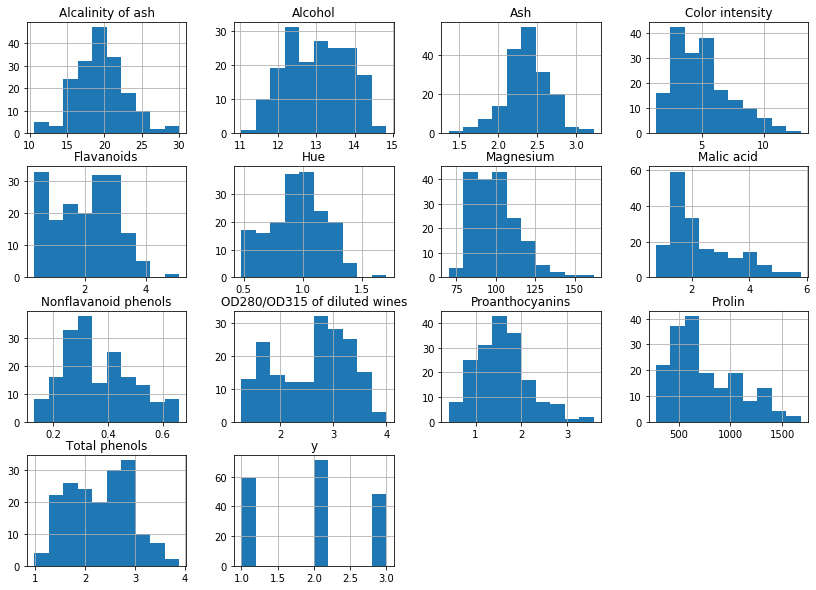

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gzip

df=pd.read_csv('wine.data',header=None)
df.columns = """y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Prolin""".split(',')

df.hist(figsize=(14,10));

df.head()

In [2]:
#Prepare data
#Hint: Normalize along samples; normalizing along features, would 'prefer' features with an offset
from sklearn.preprocessing import scale

#TODO: SCALE THE DATA
################################
# Begin your code

df_labels = pd.DataFrame(df.iloc[:,0])

df_features = df.iloc[:,1:14]

df_scaled = pd.DataFrame(scale(df_features))

df_scaled.columns = """Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Prolin""".split(',')


# End your code
################################

In [3]:
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA,FastICA
from sklearn import manifold

projection_methods = {
    'PCA' :
        PCA(n_components=2),
    'FastICA' : 
        FastICA(n_components=2),

#TODO: ADD YOUR PROJECTION METHODS
################################
# Begin your code
    

# Please see below cells for these tasks    
    
# End your code
################################
}

In [4]:

## multidimensional scaling (MDS)

df_dis = euclidean_distances(df_scaled)

In [5]:
# define function for the mds experiments

def mds_experiments(input_data, df_labels,num_iteration, value_eps):
    
    mds_coords = manifold.MDS(n_components = 2, dissimilarity = 'precomputed', max_iter = num_iteration).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_mds_coords = pd.DataFrame(mds_coords)
    mds_coords_combine = pd.concat([df_mds_coords, df_cat], axis=1)
    mds_coords_1 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 1])
    mds_coords_2 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 2])
    mds_coords_3 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 3])
    
    
    # plot
    plt.figure(figsize=(6,6))
    plt.scatter(mds_coords_1[:,0],mds_coords_1[:,1], c="green")
    plt.scatter(mds_coords_2[:,0],mds_coords_2[:,1], c="red")
    plt.scatter(mds_coords_3[:,0],mds_coords_3[:,1], c="lightblue")
    plt.title("MDS with " + " Max_iter : " + str(num_iteration) + "  eps : " + str(value_eps))
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['1','2','3'])
    plt.show()

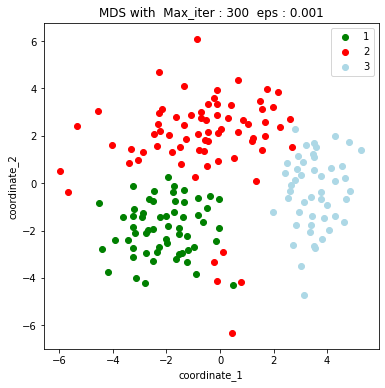

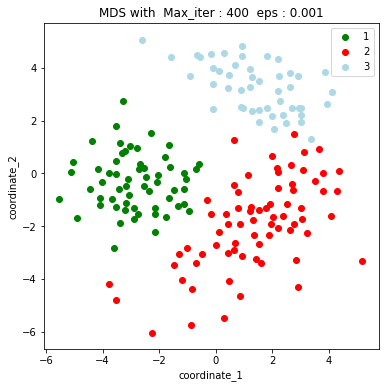

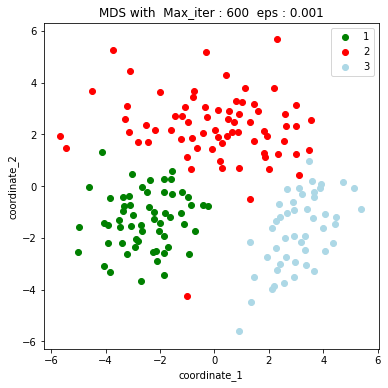

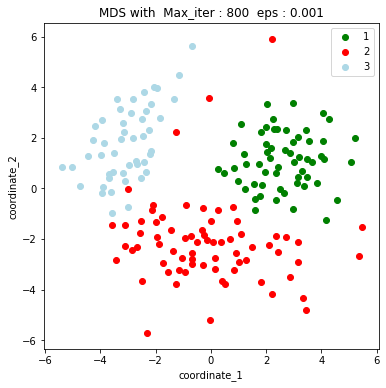

In [6]:
# MDS with different iteration values with eps = 0.001

iteration_list = [300, 400, 600, 800]

for i in iteration_list:
    
    mds_experiments(df_dis,df_labels,i,0.001)

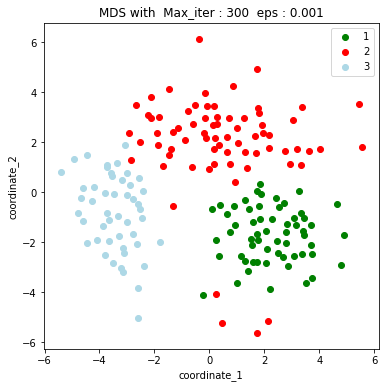

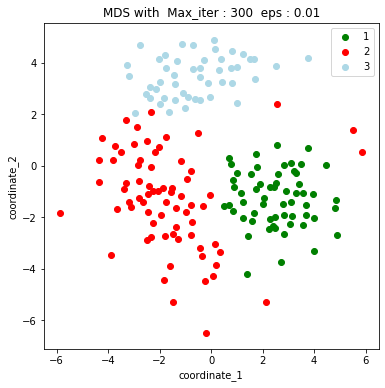

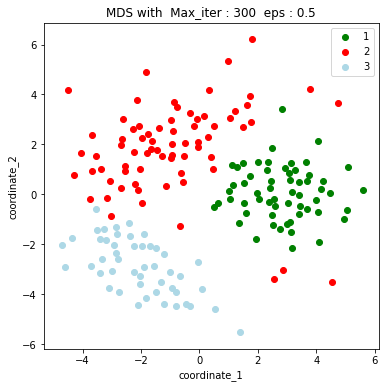

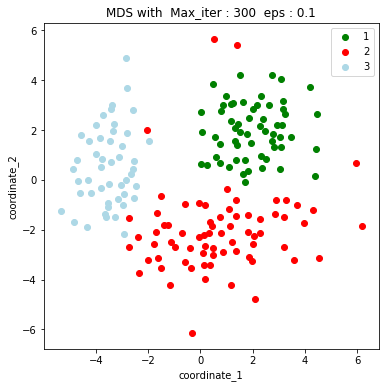

In [7]:
# MDS with different eps values with Max_iter = 300

eps_list = [0.001,0.01,0.5,0.1]

for i in eps_list:
    
    mds_experiments(df_dis,df_labels,300,i)

In [8]:
# define a function for the Local Linear Embedding experiment

def lle_experiments(input_data, df_labels,num_iteration, num_neighbors):
    
    lle_coords = manifold.LocallyLinearEmbedding(n_neighbors = num_neighbors, n_components = 2, max_iter = num_iteration).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_lle_coords = pd.DataFrame(lle_coords)
    lle_coords_combine = pd.concat([df_lle_coords, df_cat], axis=1)
    lle_coords_1 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 1])
    lle_coords_2 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 2])
    lle_coords_3 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 3])
    
    
    # plot 
    plt.figure(figsize=(6,6))
    plt.scatter(lle_coords_1[:,0],lle_coords_1[:,1], c="green")
    plt.scatter(lle_coords_2[:,0],lle_coords_2[:,1], c="red")
    plt.scatter(lle_coords_3[:,0],lle_coords_3[:,1], c="lightblue")
    plt.title("Local Linear Embedding with " + " num_iterations : " + str(num_iteration) + "  num_neighbors : " + str(num_neighbors))
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['1','2','3'])
    plt.legend
    plt.show()

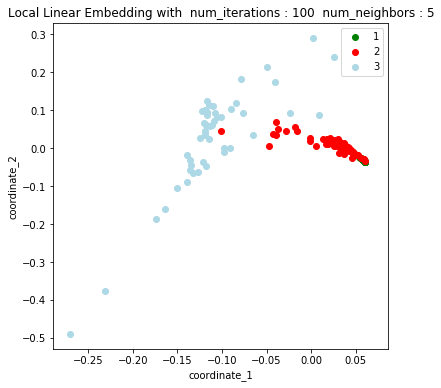

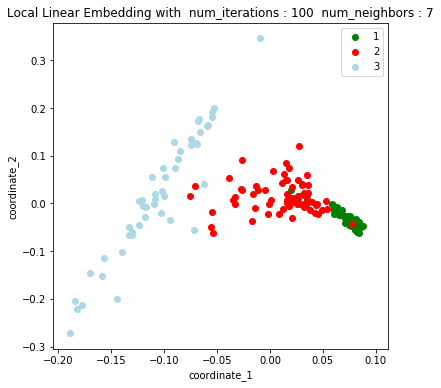

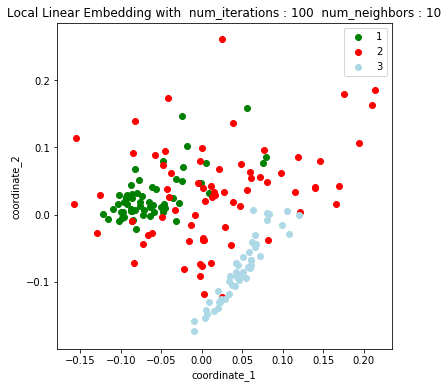

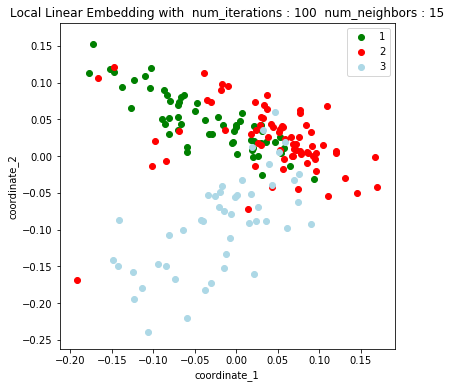

In [9]:
# LLE algorithm with different number of neighbors (max_iter = 100)

num_neighbors_list = [5,7,10,15]

for i in num_neighbors_list:
    
    lle_experiments(df_scaled,df_labels, 100, i)

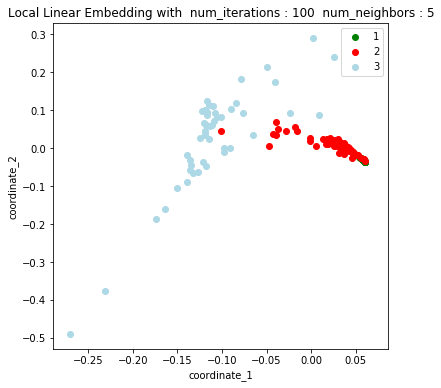

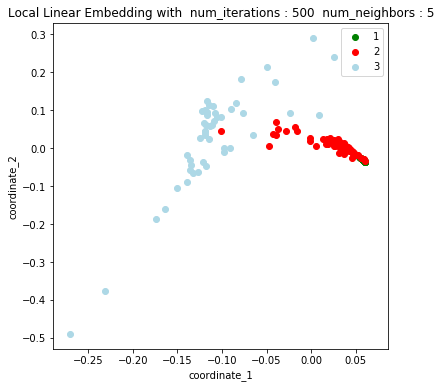

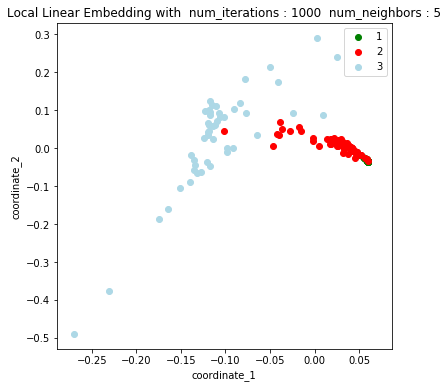

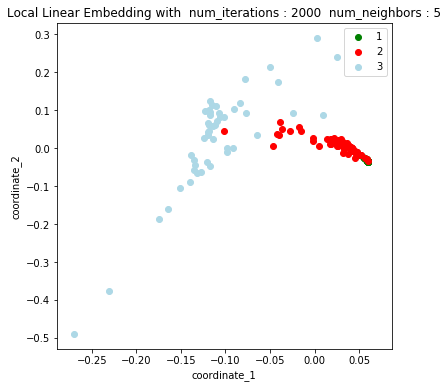

In [10]:
# LLE algorithm with different max_iteration values (n_neighbors = 5)

iteration_list = [100,500,1000,2000]

for i in iteration_list:
    
    lle_experiments(df_scaled,df_labels, i, 5)

In [11]:
# Define function for Isomap experiments

def isomap_experiments(input_data, df_labels, num_neighbors):
    
    isomap_coords = manifold.Isomap(n_neighbors = num_neighbors, n_components = 2).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_isomap_coords = pd.DataFrame(isomap_coords)
    isomap_coords_combine = pd.concat([df_isomap_coords, df_cat], axis=1)
    isomap_coords_1 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 1])
    isomap_coords_2 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 2])
    isomap_coords_3 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 3])
    
    
    # plot 
    plt.figure(figsize=(6,6))
    plt.scatter(isomap_coords_1[:,0],isomap_coords_1[:,1], c="green")
    plt.scatter(isomap_coords_2[:,0],isomap_coords_2[:,1], c="red")
    plt.scatter(isomap_coords_3[:,0],isomap_coords_3[:,1], c="lightblue")
    plt.title("Isometric Mapping with " + "  num_neighbors : " + str(num_neighbors)) 
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['1','2','3'])
    plt.legend
    plt.show()

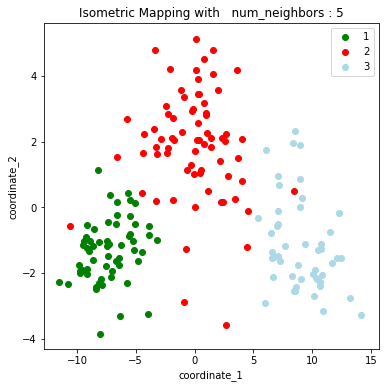

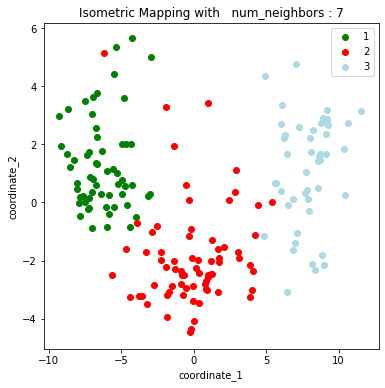

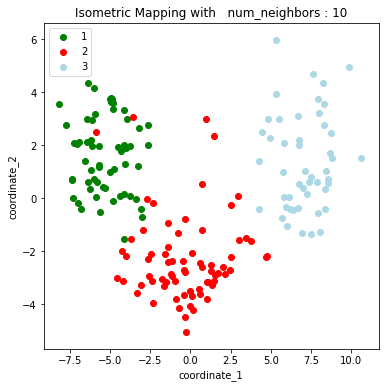

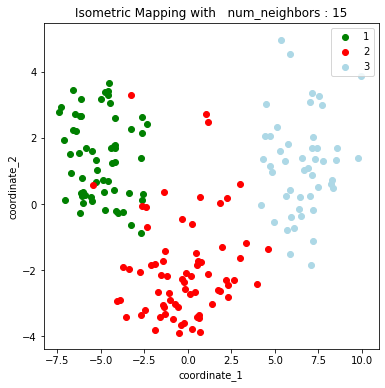

In [12]:
# Isomap algorithm with different number of neighbors

num_neighbors_list = [5,7,10,15]

for i in num_neighbors_list:
    
    isomap_experiments(df_scaled,df_labels, i)

In [13]:
# Define function for t-SNE experiments

def tsne_experiments(input_data, df_labels, rate, perplexity_value):
    
    tsne_coords = manifold.TSNE(n_components = 2, learning_rate = rate, perplexity = perplexity_value).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_tsne_coords = pd.DataFrame(tsne_coords)
    tsne_coords_combine = pd.concat([df_tsne_coords, df_cat], axis=1)
    tsne_coords_1 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 1])
    tsne_coords_2 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 2])
    tsne_coords_3 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 3])
    
    
    # plot 
    plt.figure(figsize=(6,6))
    plt.scatter(tsne_coords_1[:,0],tsne_coords_1[:,1], c="green")
    plt.scatter(tsne_coords_2[:,0],tsne_coords_2[:,1], c="red")
    plt.scatter(tsne_coords_3[:,0],tsne_coords_3[:,1], c="lightblue")
    plt.title("T-distributed Stochastic Neighbor Embedding with " + "  learning_rate : " + str(rate) + "  perplexity : " + str(perplexity_value))
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['1','2','3'])
    plt.legend
    plt.show()

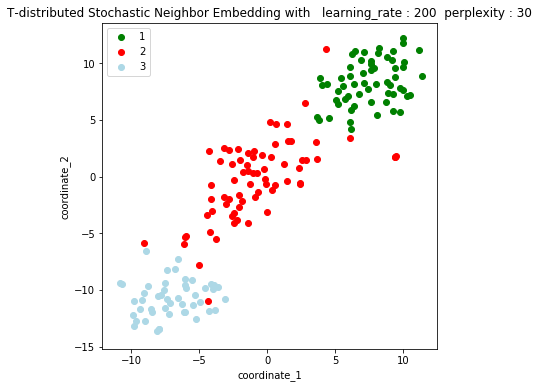

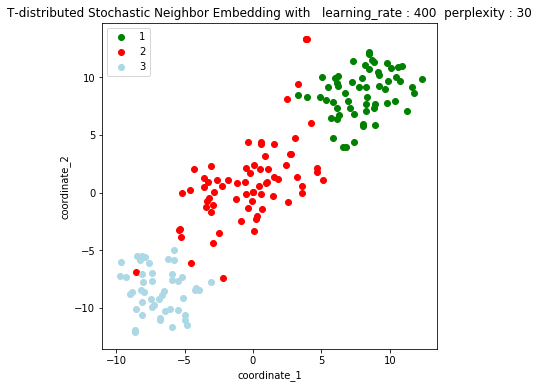

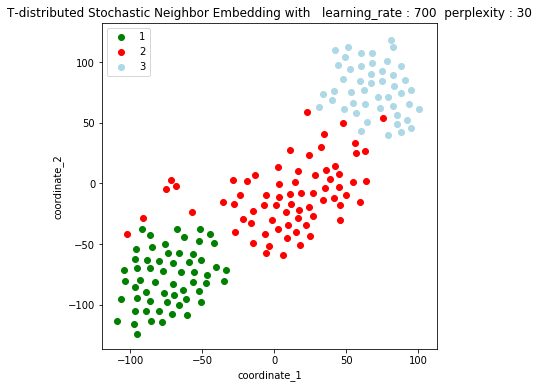

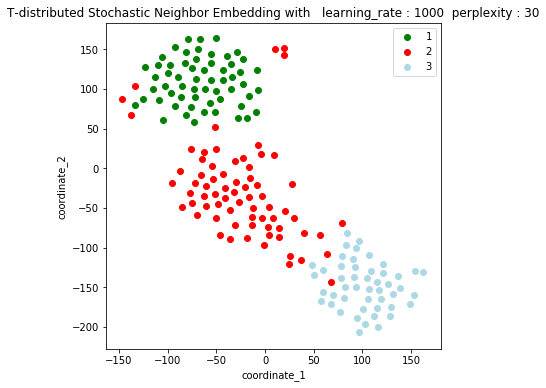

In [14]:
# t-sne algorithm with different learning rate values  (perplexity = 30)


learning_rate_list = [200,400,700,1000]

for i in learning_rate_list:
    
    tsne_experiments(df_scaled,df_labels, i, 30)

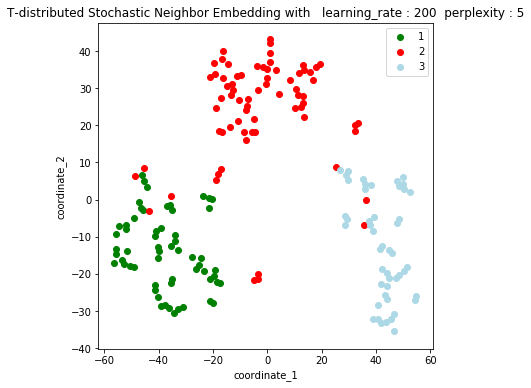

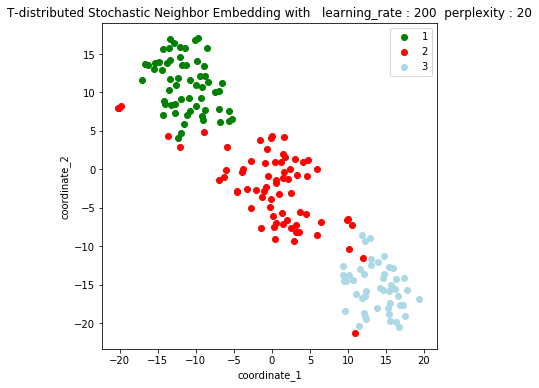

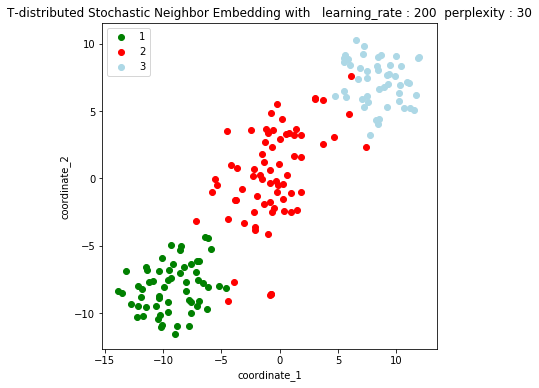

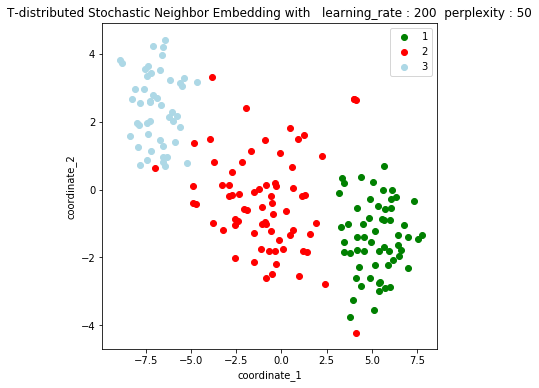

In [15]:
# t-sne algorithm with different perplexity values (learning rate = 200)

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(df_scaled,df_labels, 200, i)

In [16]:
# Conduct PCA and FastICA  

pca_coords = projection_methods['PCA'].fit_transform(scale(df_features))
ica_coords = projection_methods['FastICA'].fit_transform(scale(df_features))


In [17]:
pca_coords_dis = euclidean_distances(pca_coords)
ica_coords_dis = euclidean_distances(ica_coords)

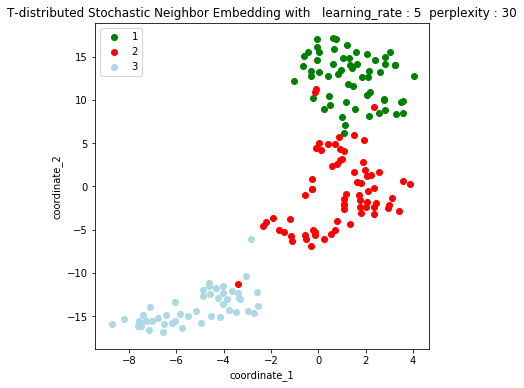

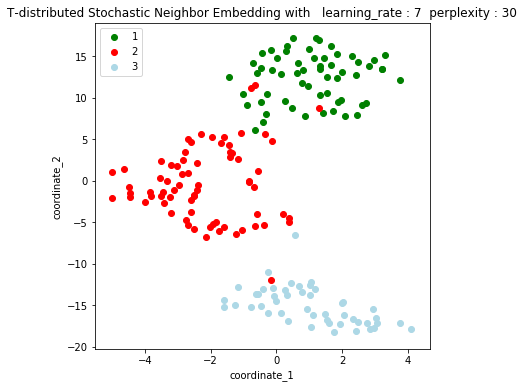

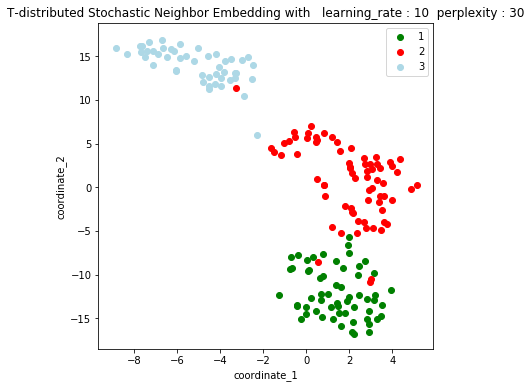

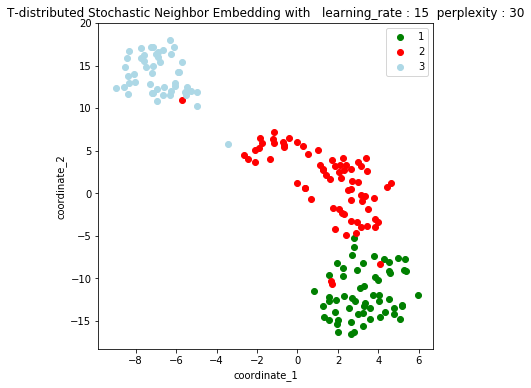

In [18]:
# PCA + t-SNE algorithm with different learning rate values (perplexity = 30)

learning_rate_list = [200,400,700,1000]

for i in num_neighbors_list:
    
    tsne_experiments(pca_coords,df_labels, i, 30)

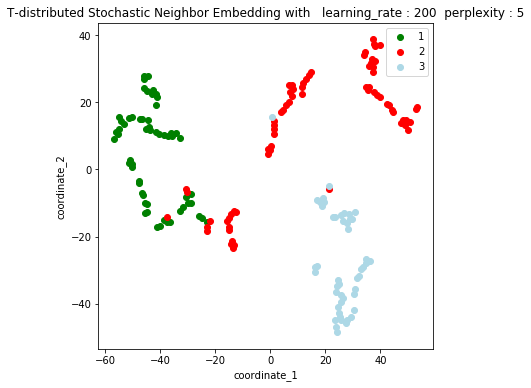

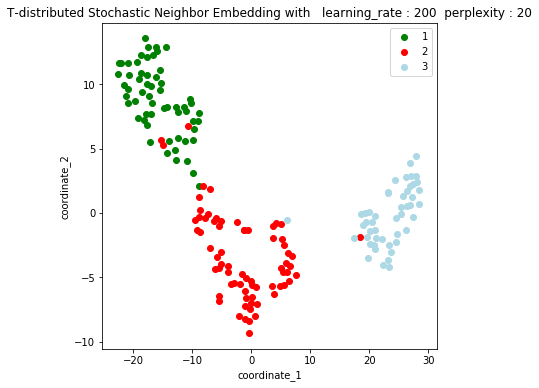

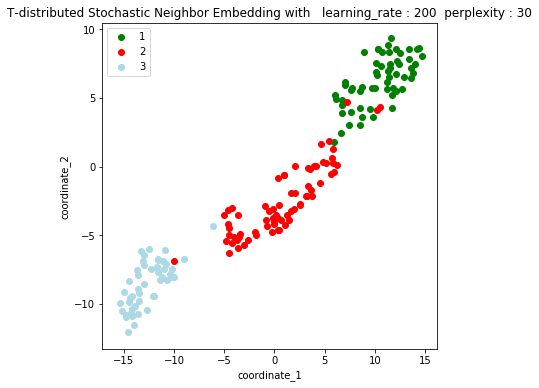

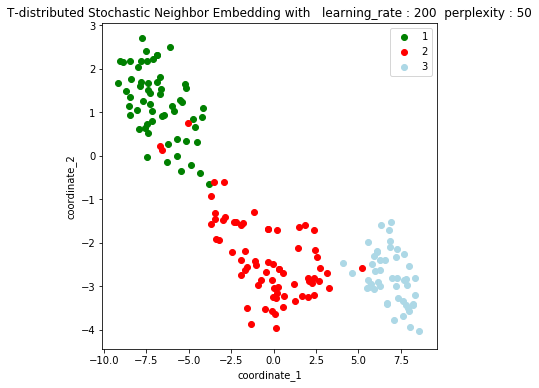

In [19]:
# PCA + t-SNE algorithm with different perplexity values (learning rate = 200)

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(pca_coords,df_labels, 200, i)

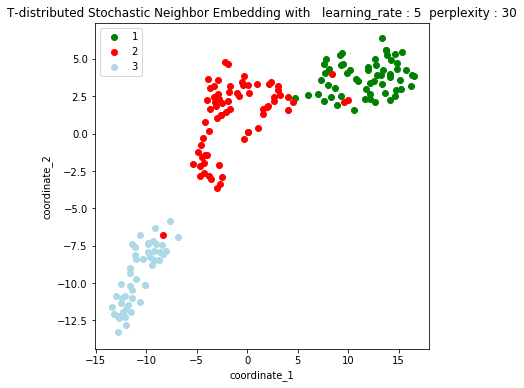

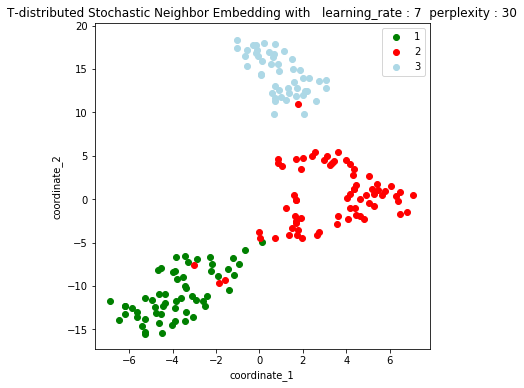

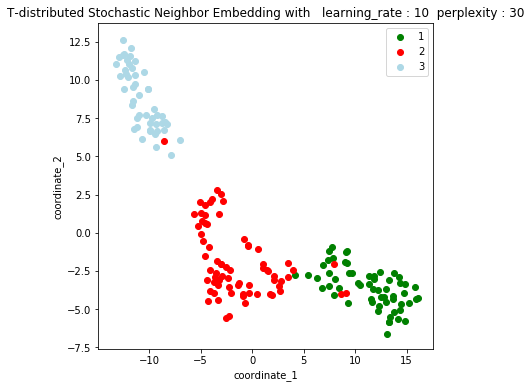

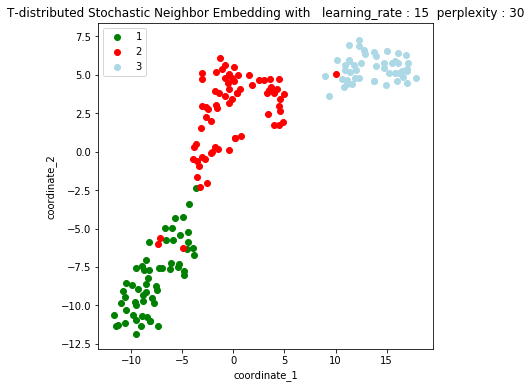

In [20]:
# FastICA + t-SNE algorithm with different learning rate values (perplexity = 30)

learning_rate_list = [200,400,700,1000]

for i in num_neighbors_list:
    
    tsne_experiments(ica_coords,df_labels, i, 30)

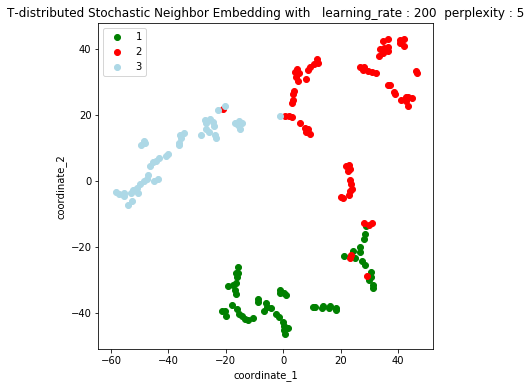

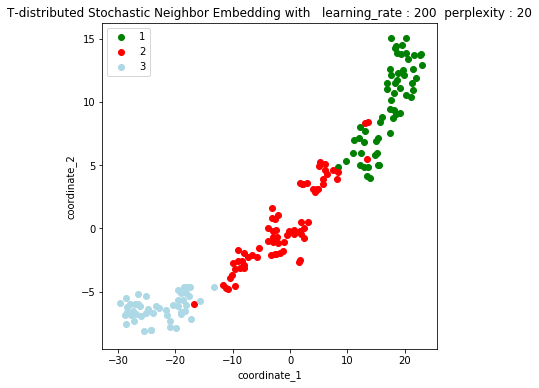

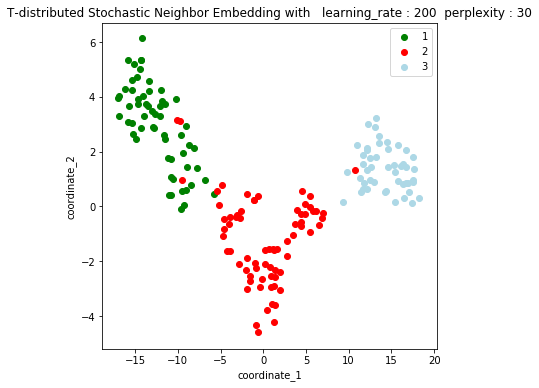

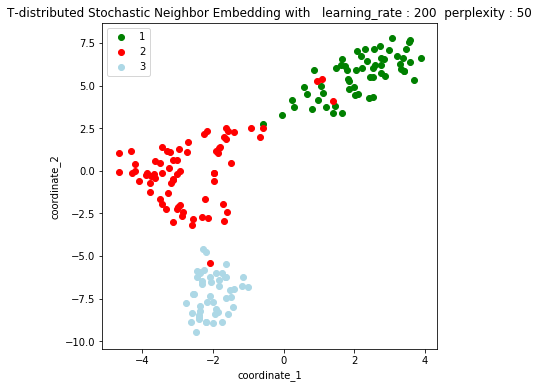

In [21]:
# FastICA + t-SNE algorithm with different values of perplexity (learning rate = 200)

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(ica_coords,df_labels, 200, i)

In [22]:
#TODO: VISUALIZE THE RESULTS
################################
# Begin your code

# please see the above works

# End your code
################################

In [23]:
#Using non-normalized data

#TODO: SAME STEPS (AS ABOVE) WITH UNSCALED DATA
################################
# Begin your code

# End your code
################################

In [24]:
# non-normalized data experiment 

df_dis_wo_norm = euclidean_distances(df_features)

In [25]:
df_dis_wo_norm.shape

(178, 178)

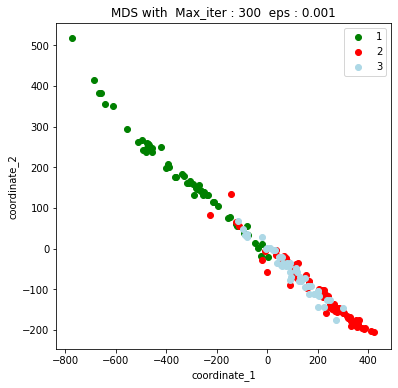

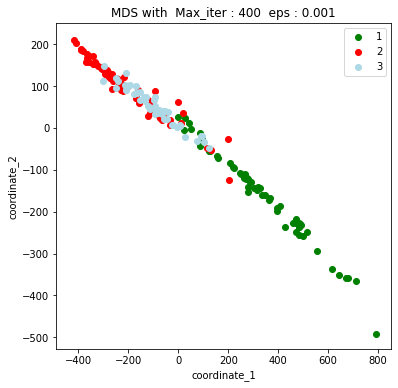

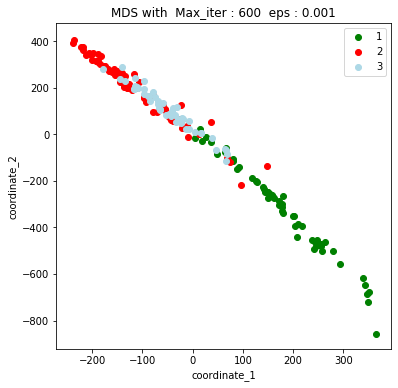

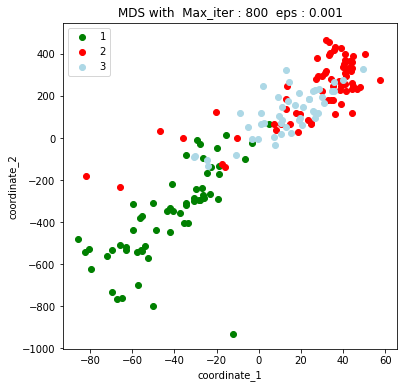

In [26]:
# mds algorithm with non-normalized data with different iteration values

iteration_list = [300, 400, 600, 800]

for i in iteration_list:
    
    mds_experiments(df_dis_wo_norm,df_labels,i,0.001)

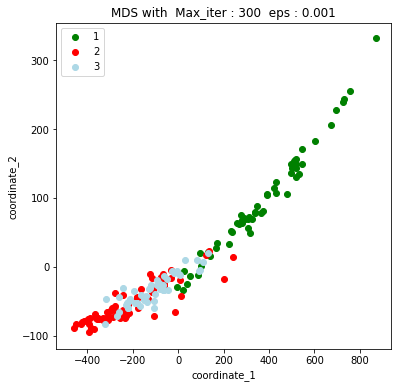

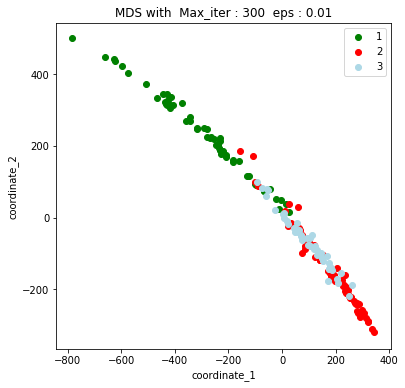

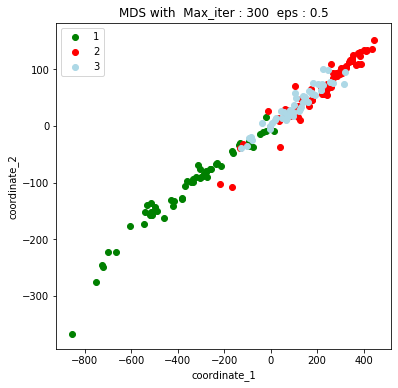

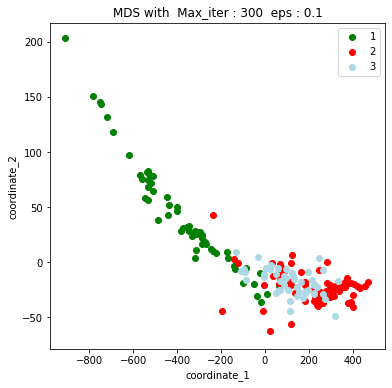

In [27]:
# mds algorithm with non-normalized data with different eps values


eps_list = [0.001,0.01,0.5,0.1]

for i in eps_list:
    
    mds_experiments(df_dis_wo_norm,df_labels,300,i)

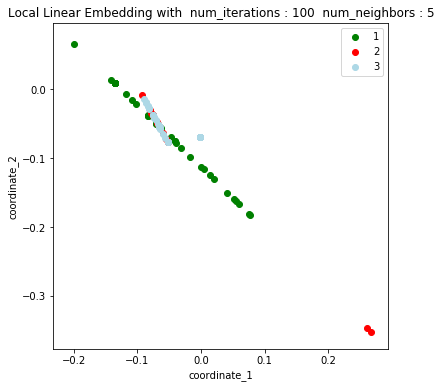

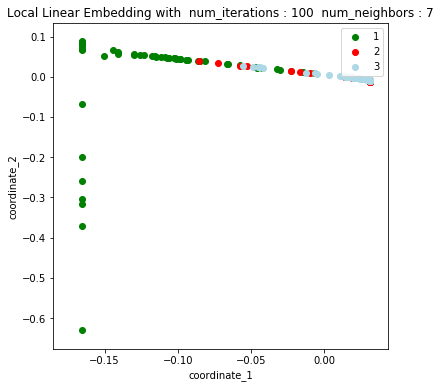

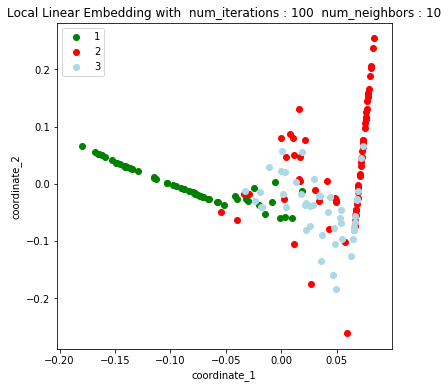

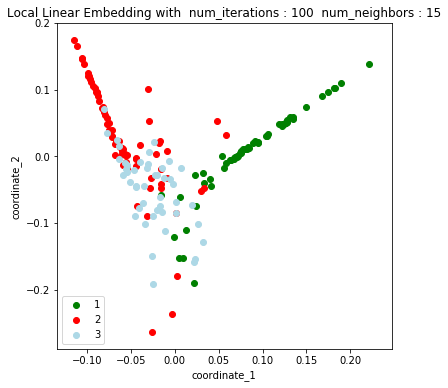

In [28]:
# LLE algorithm with non-normalized data (different number of neighbors)

num_neighbors_list = [5,7,10,15]

for i in num_neighbors_list:
    
    lle_experiments(df_features,df_labels, 100, i)

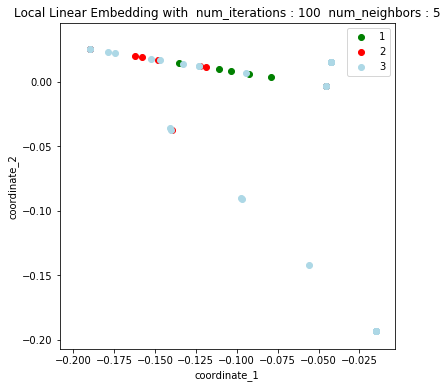

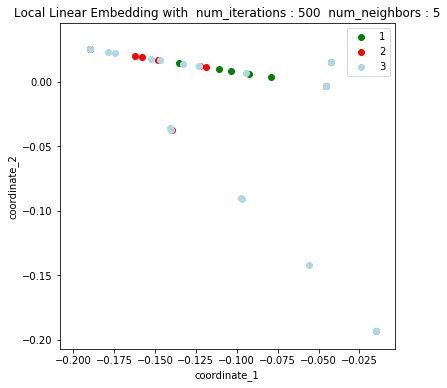

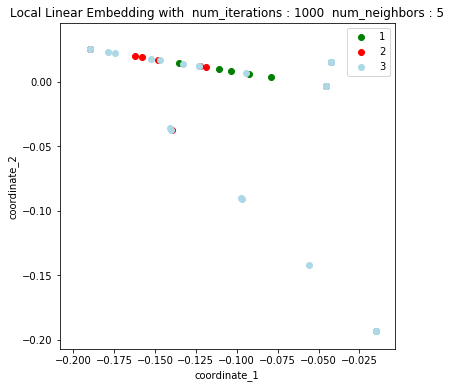

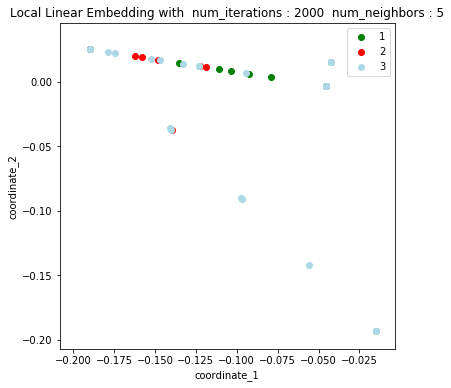

In [29]:
# LLE algorithm with non-normalized data (different number of iterations)

iteration_list = [100,500,1000,2000]

for i in iteration_list:
    
    lle_experiments(df_dis_wo_norm,df_labels, i, 5)

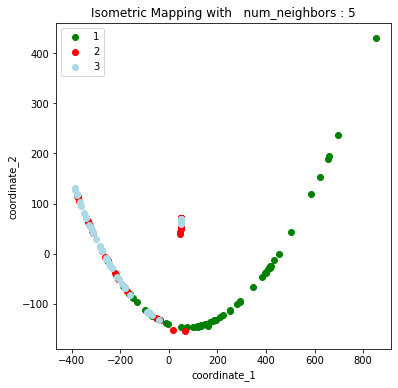

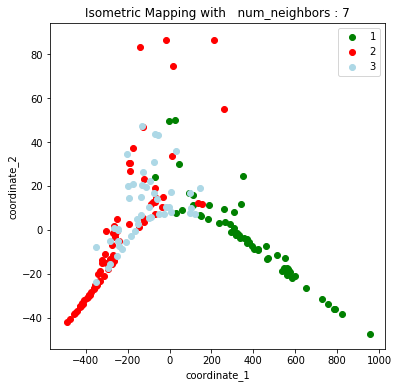

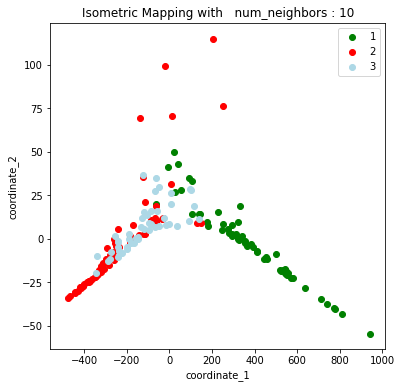

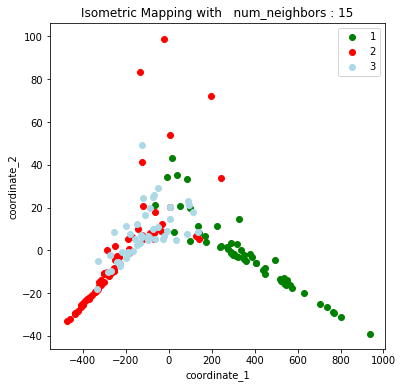

In [30]:
# Isomap with non-normalized data (different number of neighbors)

num_neighbors_list = [5,7,10,15]

for i in num_neighbors_list:
    
    isomap_experiments(df_features,df_labels, i)

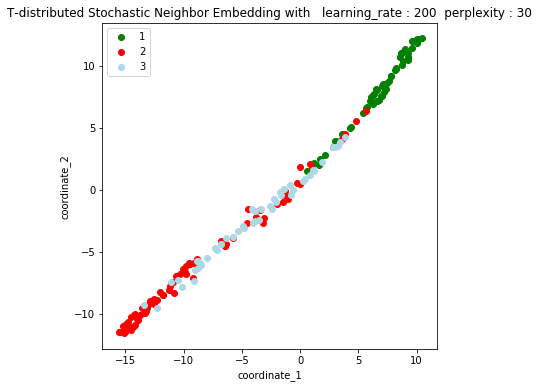

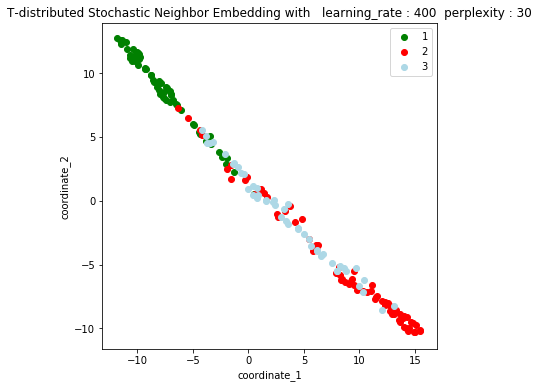

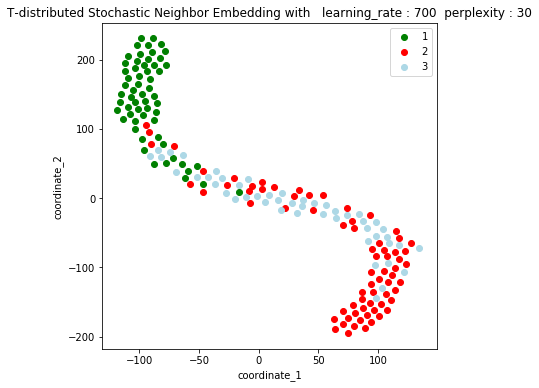

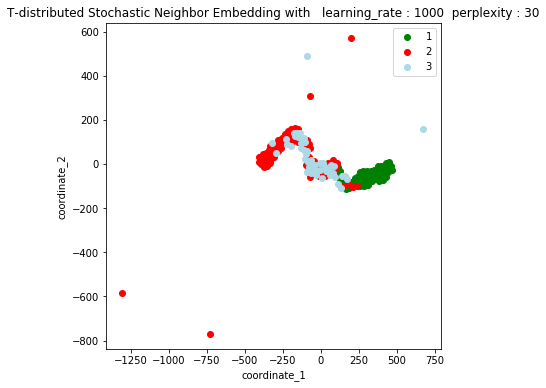

In [31]:
# t-sne algorithm with non-normalized data  (different learning rate values)

learning_rate_list = [200,400,700,1000]

for i in learning_rate_list:
    
    tsne_experiments(df_features,df_labels, i, 30)

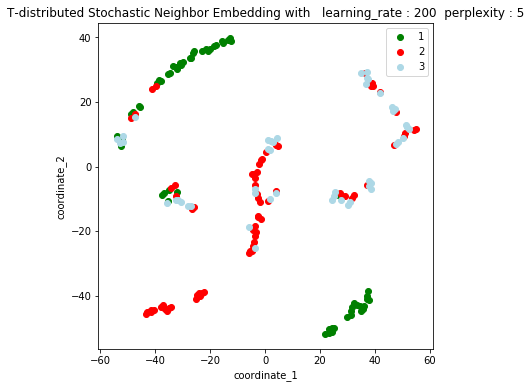

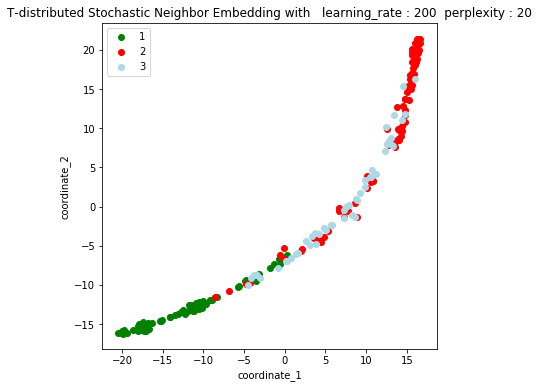

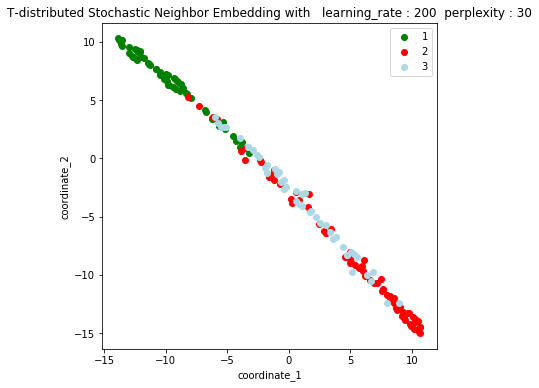

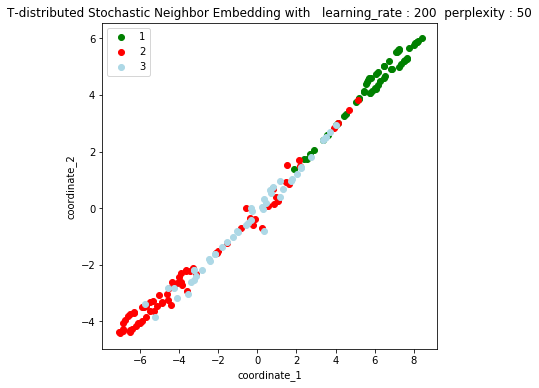

In [32]:
# t-sne algorithm with non-normalized data (different perplexity values) 

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(df_features,df_labels, 200, i)

In [33]:
# PCA + t-sne with non-normalized 

In [34]:
pca_coords_wo_norm = projection_methods['PCA'].fit_transform(df_features)


In [35]:
pca_coords_dis_wo_norm = euclidean_distances(pca_coords_wo_norm)

In [36]:
pca_coords_dis_wo_norm.shape

(178, 178)

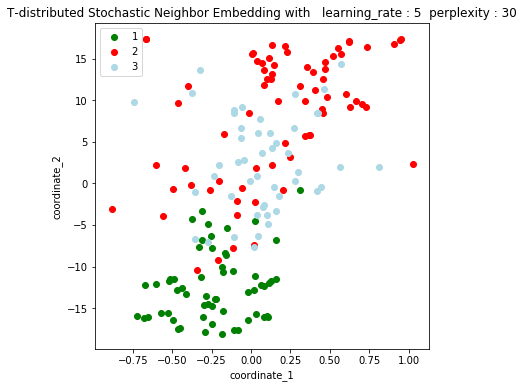

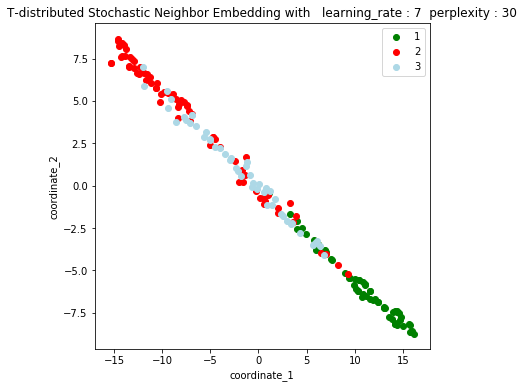

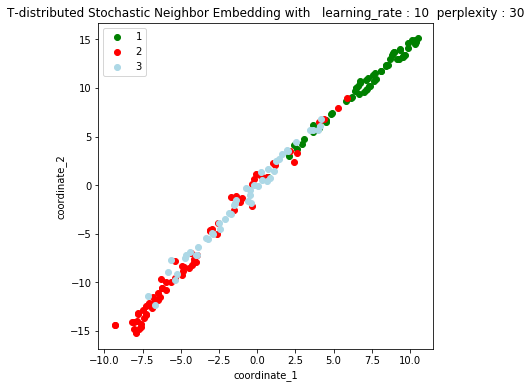

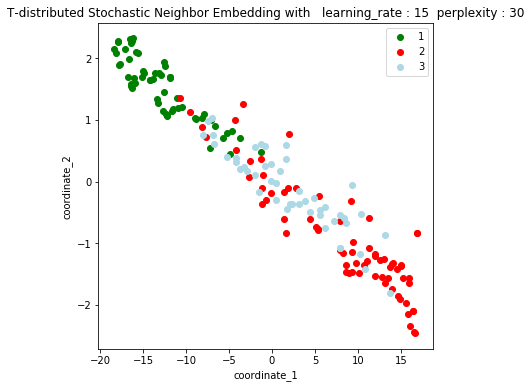

In [37]:
# PCA + t-SNE algorithm with non-normalized data (different learning rate values)

learning_rate_list = [200,400,700,1000]

for i in num_neighbors_list:
    
    tsne_experiments(pca_coords_wo_norm,df_labels, i, 30)

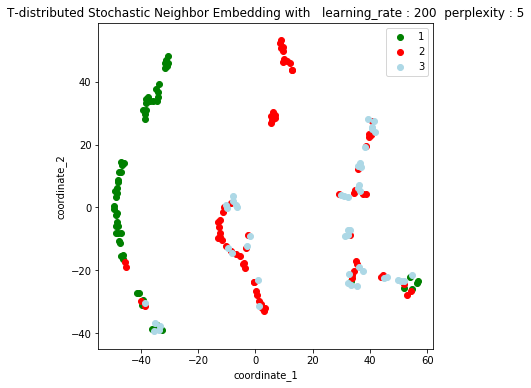

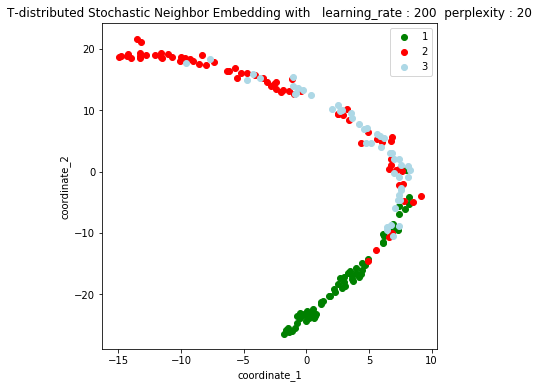

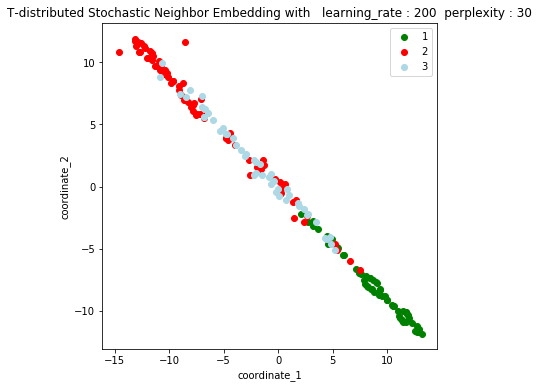

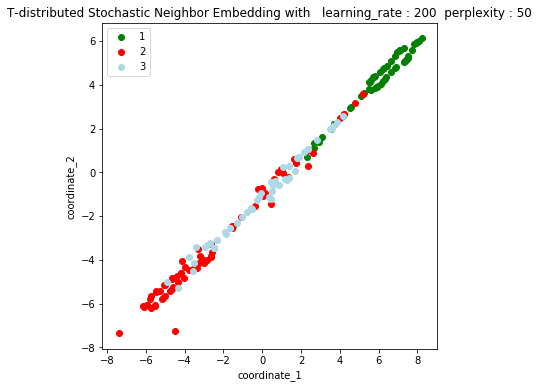

In [38]:
# PCA + t-SNE algorithm with non-normalized data (different values of perplexity) 

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(pca_coords_wo_norm,df_labels, 200, i)

In [39]:
# Fast ICA + t-sne algorithm with non-normalized data

In [40]:
ica_coords_wo_norm = projection_methods['FastICA'].fit_transform(df_features)

In [41]:
ica_coords_dis_wo_norm = euclidean_distances(ica_coords_wo_norm)

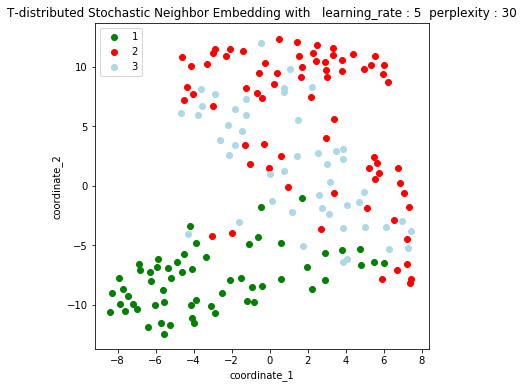

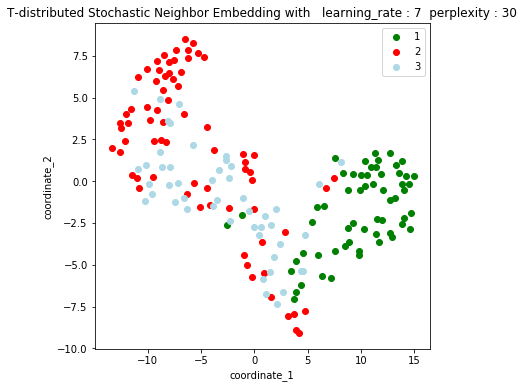

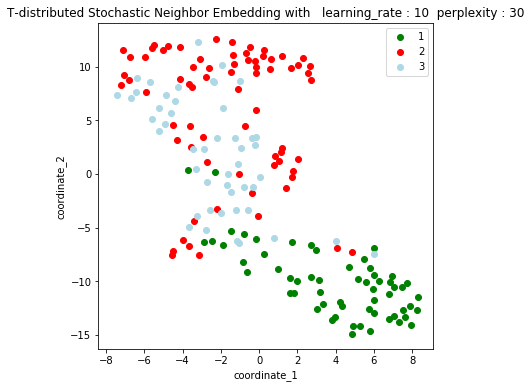

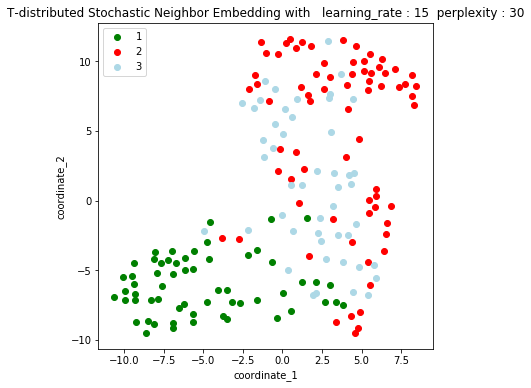

In [42]:
# FastICA + t-SNE algorithm with different learning rate values 

learning_rate_list = [200,400,700,1000]

for i in num_neighbors_list:
    
    tsne_experiments(ica_coords_wo_norm,df_labels, i, 30)

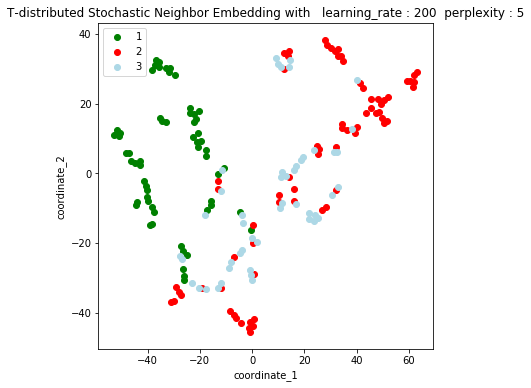

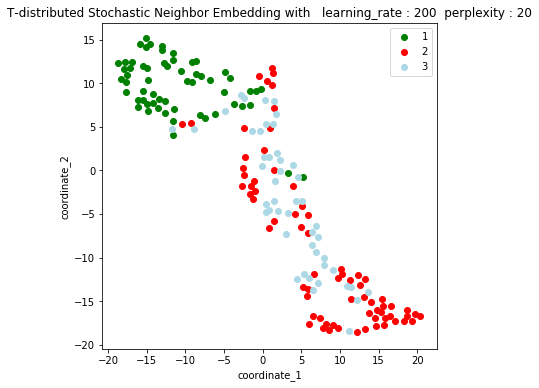

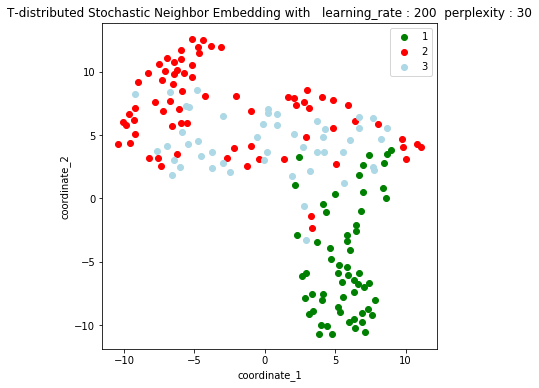

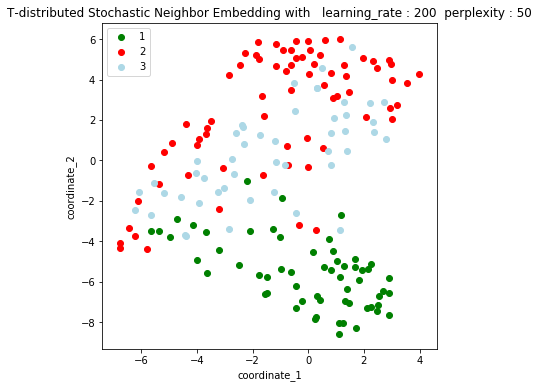

In [43]:
# FastICA + t-SNE algorithm with different values of perplexity 

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(ica_coords_wo_norm,df_labels, 200, i)

<h3 style="color:rgb(210,90,80)">Questions (30 points):</h3>

Your answers here

* Multidimensional Scaling (MDS):

* Locally Linear Embedding (LLE):

* Isomap:

* t-SNE:

* Comparison:

#### Multidimensional Scaling (MDS) 

Multidimensional scaling is a method of manifold learning to reduce the dimensionality of a higher dimensionality in the dataset. MDS uses a dissimilarity matrix (D) where $ D_{ij} $ are points $i$ and $j$ and creates a mapping for dimension reduction with preserving the dissimilarities as closely as possible. The dissimilarity matrix can be computed or estimated from the given dataset. MDS has two different methods which are metric and non-metric. In the metric method, a given set of a dissimilarity matrix, a function, and the number of dimensions in subspace find a spatial optimal configuration of data points. In classical metric MDS, it uses eigenvalue decomposition to find an optimal, instead of estimating the dissimilarity matrix. In non-metric MDS, it is for ordinal data and keeping the order of dissimilarity metrics.  



#### Local Linear Embedding (LLE)

This algorithm is a manifold learning algorithm that is topology preserving. The main concept of this algorithm is that computing a different linear dimensionality reduction at each point, and then aggregate the computed linear pieces with minimal discrepancy. This algorithm mainly consists of three procedures. The first step of the LLE is looking the k number of the nearest neighbors for each point in the dataset. After finding the k-number neighbors, finding the weights for local linearly approximating the data in each neighborhood. The final step of the LLE is to find an optimal low-dimensionality from the computed weights.  

#### Isometric Mapping (Isomap)

Isometric mapping (Isomap) is a manifold learning algorithm of a non-linear dimensionality reduction. The fundamental concept of this algorithm is based on the spectral theory that is able to preserve the geodesic distances in the lower dimension. The first step of this algorithm is to form a neighborhood network which is for measuring the geodesic distance between all pairs of points by using graph distance. The final step of this algorithm is to apply multidimensional scaling (MDS) to the matrix of graph distance for the sake of constructing an embedding of the data.

#### t-SNE 

T-distributed Stochastic Neighbor Embedding (t-SNE) uses the local relationships between points for creating a low dimensional mapping. To measure the relationship between the points in the dataset, t-SNE uses a probability distribution (Gaussian) for the measurement. Mainly, t-SNE consists of two steps to perform dimension reduction. The first step of this algorithm is to create a probability distribution. A selected point which behaves as a pivot point to define the probability which is proportionate to the probability density of a Gaussian centered at the pivot point. During the step, the hyper-parameter of "perplexity" is the most influential factor to define the probability distribution. The next step in this algorithm is to recreate the probability distribution for mapping in a lower dimension. For recreation, t-SNE uses a Student t-distribution to avoid the crowding problem.

* Which methods seems to work best for each of the datasets? 

Based on the results from previous experiments, a t-SNE algorithm with the proper value of perplexity (~30) is a desirable method of manifold learning for this dataset. As well, the algorithm with both PCA and FastICA provide a better performing compared to others. However, it is necessary to choose a proper value of perplexity for obtaining optimal solution with t-SNE algorithm. The result from t-SNE with the value of perplexity (5) returns undesirable outcome from the experiment. Another desirable method is Isometric Mapping (Isomap) with a reasonable selecting number of neighbors (>7).



* Is it necessary to normalize the data before using the algorithms? 

According to the results from the experiments of all algorithms, it proves that a normalized dataset is a necessary work prior to applying the algorithm. Based on the results, the performance with a non-normalized dataset returns an undesirable result and most of the data points are overlapped.




<h2 style="color:rgb(0,120,170)">Task 2: Larger dataset</h2> 

In Task 1 we have investigated different projection methods. Now let's test them on a higher dimensional dataset.

Download the 'fashion-mnist' dataset (4 files) from [here](https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion).
The data consists of 10 different classes and is set up very similarly to MNIST. Merge train and test data and select a subset of 1000 samples (if you run into memory problems simply reduce the sample size).

<h3 style="color:rgb(0,120,170)">Tasks:</h3> 

* Run the following algorithms (basically you can test all the parameter settings from Task 1): <br> a) Multidimensional Scaling <br> b) Locally Linear Embedding <br> c) Isomap <br> d) t-SNE <br> e) t-SNE with PCA: Downproject the data with PCA to a reasonable number of principal components, use the output as an input to t-SNE 

* Discuss the results.

<h3 style="color:rgb(210,90,80)">Code (25 points):</h3>

In [44]:
#Load data
with gzip.open('fashion-mnist/train-labels-idx1-ubyte.gz') as file:
    y_train = np.frombuffer(file.read(), dtype=np.uint8, offset=8)
with gzip.open('fashion-mnist/train-images-idx3-ubyte.gz') as file:
    X_train = np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape(len(y_train), 784)
with gzip.open('fashion-mnist/t10k-labels-idx1-ubyte.gz') as file:
    y_test = np.frombuffer(file.read(), dtype=np.uint8, offset=8)
with gzip.open('fashion-mnist/t10k-images-idx3-ubyte.gz') as file:
    X_test = np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape(len(y_test), 784)

X = np.append(X_train,X_test,axis=0)
y = np.append(y_train,y_test,axis=0)

#Shuffle data
idx_shuff =  np.arange(len(y))
np.random.shuffle( idx_shuff )
X = X[idx_shuff,:]
y = y[idx_shuff]

from sklearn.preprocessing import scale
X = scale(X) #zero mean and unit variance

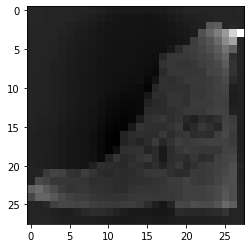

In [45]:
#Plot an example of the mnist-fashion dataset
show_img = X[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [46]:
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA,FastICA
from sklearn import manifold

projection_methods = {
    'PCA' :
        PCA(n_components=2),
    'FastICA' : 
        FastICA(n_components=2),

#TODO: ADD YOUR PROJECTION METHODS
################################
# Begin your code
    

# End your code
################################

}

In [47]:
#TODO: VISUALIZE THE RESULTS
################################
# Begin your code

# please see below cells

# End your code
################################

In [48]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [49]:
# make a subset for each X and y with 1000 samples

X_subset = df_X.iloc[0:1000]
y_subset = df_y.iloc[0:1000]

In [50]:
X_subset_scaled = scale(X_subset)

C:\Users\J. Park\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [51]:
mnist_dis = euclidean_distances(X_subset_scaled)

In [52]:
def mds_experiments(input_data, df_labels,num_iteration, value_eps):
    
    mds_coords = manifold.MDS(n_components = 2, dissimilarity = 'precomputed', max_iter = num_iteration).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_cat.columns = ['y']
    df_mds_coords = pd.DataFrame(mds_coords)
    mds_coords_combine = pd.concat([df_mds_coords, df_cat], axis=1)
    mds_coords_0 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 0])
    mds_coords_1 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 1])
    mds_coords_2 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 2])
    mds_coords_3 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 3])
    mds_coords_4 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 4])
    mds_coords_5 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 5])
    mds_coords_6 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 6])
    mds_coords_7 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 7])
    mds_coords_8 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 8])
    mds_coords_9 = np.array(mds_coords_combine.loc[mds_coords_combine['y'] == 9])
    
    # plot
    plt.figure(figsize=(6,6))
    plt.scatter(mds_coords_0[:,0],mds_coords_0[:,1], c="orange")
    plt.scatter(mds_coords_1[:,0],mds_coords_1[:,1], c="green")
    plt.scatter(mds_coords_2[:,0],mds_coords_2[:,1], c="red")
    plt.scatter(mds_coords_3[:,0],mds_coords_3[:,1], c="lightblue")
    plt.scatter(mds_coords_4[:,0],mds_coords_4[:,1], c="yellow")
    plt.scatter(mds_coords_5[:,0],mds_coords_5[:,1], c="lime")
    plt.scatter(mds_coords_6[:,0],mds_coords_6[:,1], c="blue")
    plt.scatter(mds_coords_7[:,0],mds_coords_7[:,1], c="grey")
    plt.scatter(mds_coords_8[:,0],mds_coords_8[:,1], c="black")
    plt.scatter(mds_coords_9[:,0],mds_coords_9[:,1], c="brown")

    plt.title("MDS with " + " Max_iter : " + str(num_iteration) + "  eps : " + str(value_eps))
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.show()

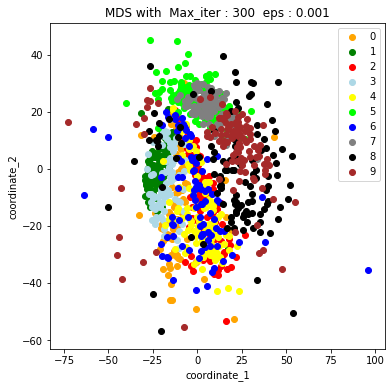

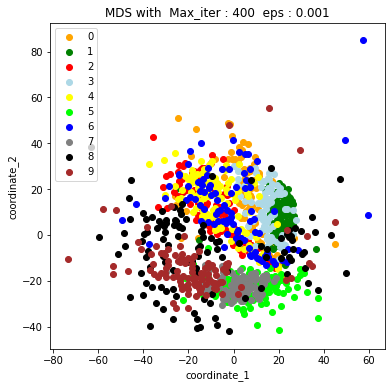

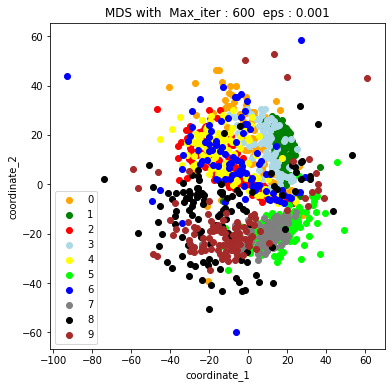

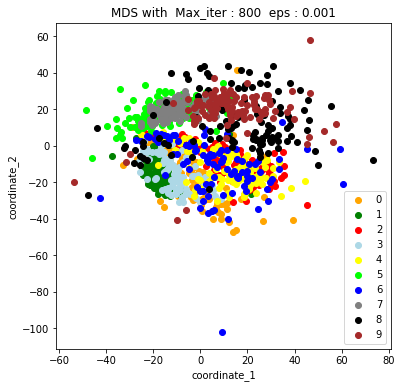

In [53]:
# MDs with different iteration values with eps = 0.001

iteration_list = [300, 400, 600, 800]

for i in iteration_list:
    
    mds_experiments(mnist_dis,y_subset,i,0.001)

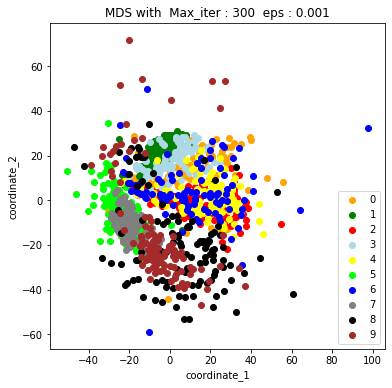

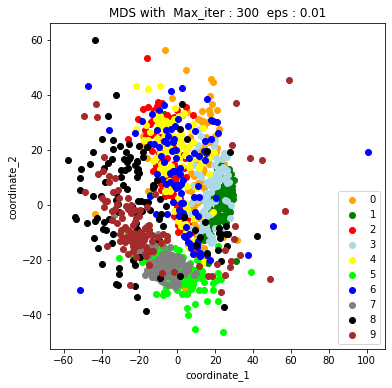

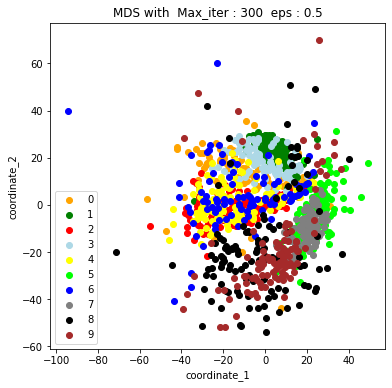

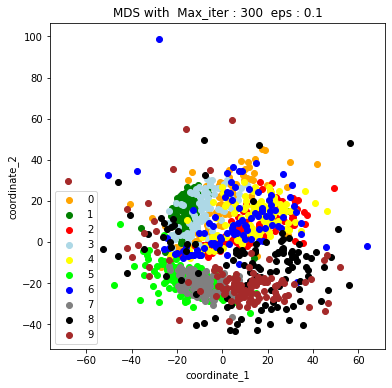

In [54]:
# MDS with different eps values with Max_iter = 300

eps_list = [0.001,0.01,0.5,0.1]

for i in eps_list:
    
    mds_experiments(mnist_dis,y_subset,300,i)

In [55]:
# Local Linear Embedding Algorithm


def lle_experiments(input_data, df_labels,num_iteration, num_neighbors):
    
    lle_coords = manifold.LocallyLinearEmbedding(n_neighbors = num_neighbors, n_components = 2, max_iter = num_iteration).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_cat.columns = ['y']
    df_lle_coords = pd.DataFrame(lle_coords)
    lle_coords_combine = pd.concat([df_lle_coords, df_cat], axis=1)
    lle_coords_0 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 0])
    lle_coords_1 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 1])
    lle_coords_2 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 2])
    lle_coords_3 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 3])
    lle_coords_4 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 4])
    lle_coords_5 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 5])
    lle_coords_6 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 6])
    lle_coords_7 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 7])
    lle_coords_8 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 8])
    lle_coords_9 = np.array(lle_coords_combine.loc[lle_coords_combine['y'] == 9])
    
    # plot
    plt.figure(figsize=(6,6))
    plt.scatter(lle_coords_0[:,0],lle_coords_0[:,1], c="orange")
    plt.scatter(lle_coords_1[:,0],lle_coords_1[:,1], c="green")
    plt.scatter(lle_coords_2[:,0],lle_coords_2[:,1], c="red")
    plt.scatter(lle_coords_3[:,0],lle_coords_3[:,1], c="lightblue")
    plt.scatter(lle_coords_4[:,0],lle_coords_4[:,1], c="yellow")
    plt.scatter(lle_coords_5[:,0],lle_coords_5[:,1], c="lime")
    plt.scatter(lle_coords_6[:,0],lle_coords_6[:,1], c="blue")
    plt.scatter(lle_coords_7[:,0],lle_coords_7[:,1], c="grey")
    plt.scatter(lle_coords_8[:,0],lle_coords_8[:,1], c="black")
    plt.scatter(lle_coords_9[:,0],lle_coords_9[:,1], c="brown")
    
    plt.title("Local Linear Embedding with " + " num_iterations : " + str(num_iteration) + "  num_neighbors : " + str(num_neighbors))
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.legend
    plt.show()

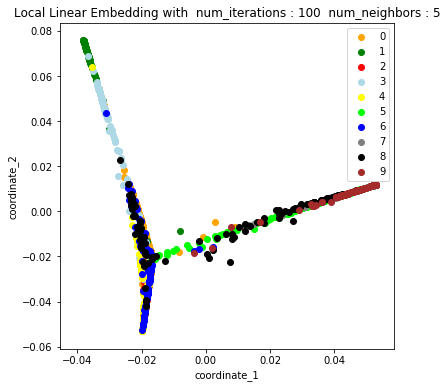

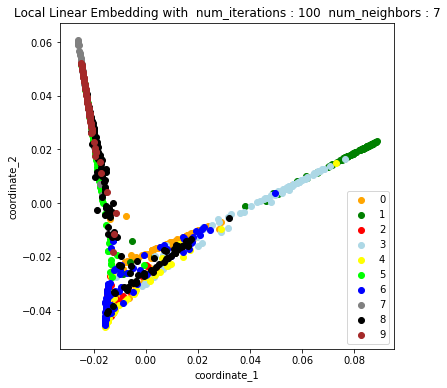

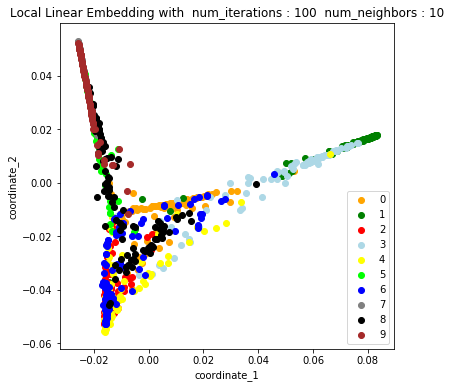

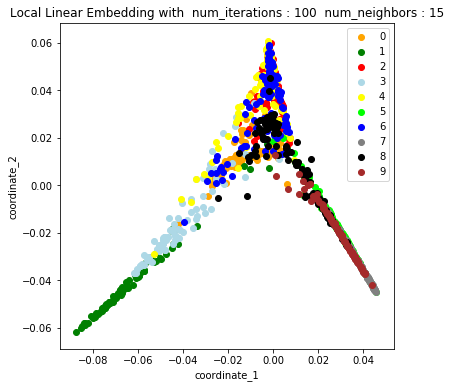

In [56]:
# LLE algorithm with different number of neighbors (max_iter = 100)

num_neighbors_list = [5,7,10,15]

for i in num_neighbors_list:
    
    lle_experiments(X_subset_scaled,y_subset, 100, i)

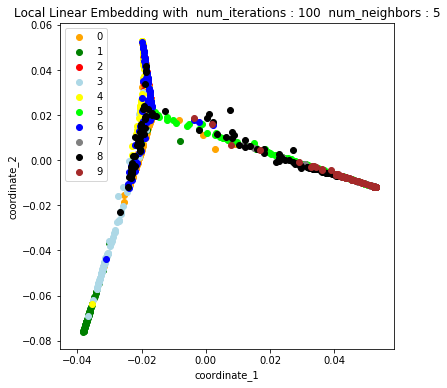

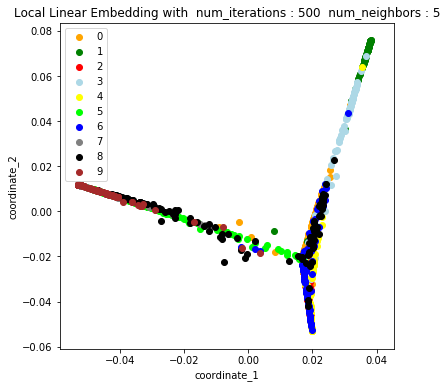

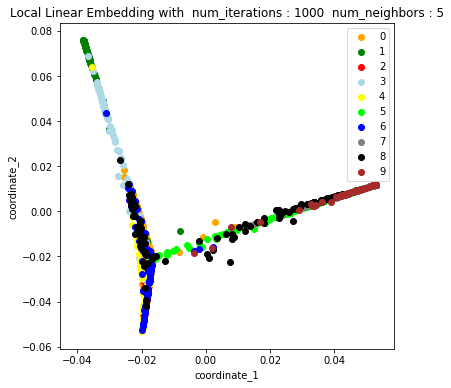

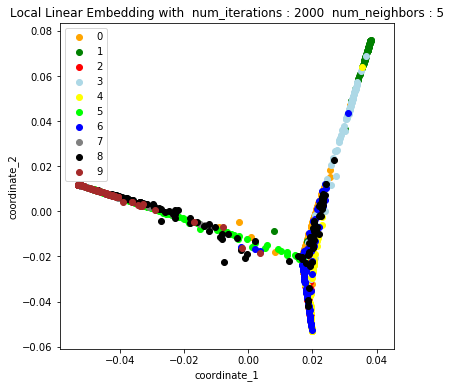

In [57]:
# LLE algorithm with different max_iteration values (n_neighbors = 5)

iteration_list = [100,500,1000,2000]

for i in iteration_list:
    
    lle_experiments(X_subset_scaled,y_subset, i, 5)

In [58]:
# ISomap 

def isomap_experiments(input_data, df_labels, num_neighbors):
    
    isomap_coords = manifold.Isomap(n_neighbors = num_neighbors, n_components = 2).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_cat.columns = ['y']
    df_isomap_coords = pd.DataFrame(isomap_coords)
    isomap_coords_combine = pd.concat([df_isomap_coords, df_cat], axis=1)
    isomap_coords_0 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 0])
    isomap_coords_1 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 1])
    isomap_coords_2 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 2])
    isomap_coords_3 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 3])
    isomap_coords_4 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 4])
    isomap_coords_5 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 5])
    isomap_coords_6 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 6])
    isomap_coords_7 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 7])
    isomap_coords_8 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 8])
    isomap_coords_9 = np.array(isomap_coords_combine.loc[isomap_coords_combine['y'] == 9])
    
    # plot
    plt.figure(figsize=(6,6))
    plt.scatter(isomap_coords_0[:,0],isomap_coords_0[:,1], c="orange")
    plt.scatter(isomap_coords_1[:,0],isomap_coords_1[:,1], c="green")
    plt.scatter(isomap_coords_2[:,0],isomap_coords_2[:,1], c="red")
    plt.scatter(isomap_coords_3[:,0],isomap_coords_3[:,1], c="lightblue")
    plt.scatter(isomap_coords_4[:,0],isomap_coords_4[:,1], c="yellow")
    plt.scatter(isomap_coords_5[:,0],isomap_coords_5[:,1], c="lime")
    plt.scatter(isomap_coords_6[:,0],isomap_coords_6[:,1], c="blue")
    plt.scatter(isomap_coords_7[:,0],isomap_coords_7[:,1], c="grey")
    plt.scatter(isomap_coords_8[:,0],isomap_coords_8[:,1], c="black")
    plt.scatter(isomap_coords_9[:,0],isomap_coords_9[:,1], c="brown")
    
    plt.title("Isometric Mapping with " + "  num_neighbors : " + str(num_neighbors)) 
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.legend
    plt.show()

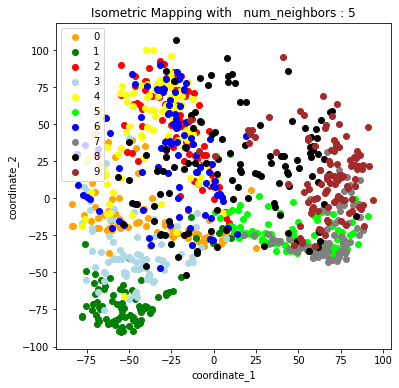

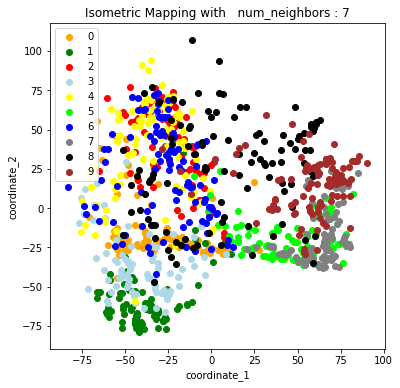

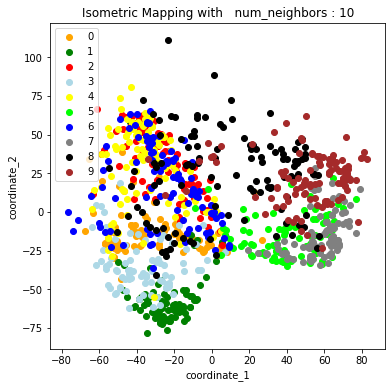

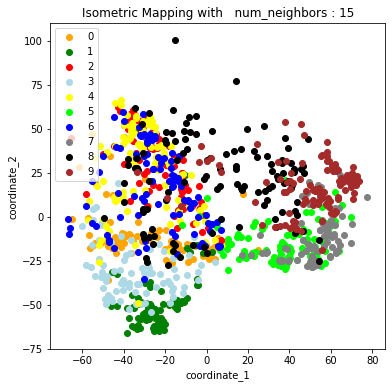

In [59]:
# Isomap algorithm with different number of neighbors

num_neighbors_list = [5,7,10,15]

for i in num_neighbors_list:
    
    isomap_experiments(X_subset_scaled,y_subset, i)

In [60]:
# t-SNE Algorithm


def tsne_experiments(input_data, df_labels, rate, perplexity_value):
    
    tsne_coords = manifold.TSNE(n_components = 2, learning_rate = rate, perplexity = perplexity_value).fit_transform(input_data)
    df_cat = df_labels.astype(int)
    df_cat.columns = ['y']
    df_tsne_coords = pd.DataFrame(tsne_coords)
    tsne_coords_combine = pd.concat([df_tsne_coords, df_cat], axis=1)
    tsne_coords_0 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 0])
    tsne_coords_1 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 1])
    tsne_coords_2 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 2])
    tsne_coords_3 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 3])
    tsne_coords_4 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 4])
    tsne_coords_5 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 5])
    tsne_coords_6 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 6])
    tsne_coords_7 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 7])
    tsne_coords_8 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 8])
    tsne_coords_9 = np.array(tsne_coords_combine.loc[tsne_coords_combine['y'] == 9])
    
    # plot
    plt.figure(figsize=(6,6))
    plt.scatter(tsne_coords_0[:,0],tsne_coords_0[:,1], c="orange")
    plt.scatter(tsne_coords_1[:,0],tsne_coords_1[:,1], c="green")
    plt.scatter(tsne_coords_2[:,0],tsne_coords_2[:,1], c="red")
    plt.scatter(tsne_coords_3[:,0],tsne_coords_3[:,1], c="lightblue")
    plt.scatter(tsne_coords_4[:,0],tsne_coords_4[:,1], c="yellow")
    plt.scatter(tsne_coords_5[:,0],tsne_coords_5[:,1], c="lime")
    plt.scatter(tsne_coords_6[:,0],tsne_coords_6[:,1], c="blue")
    plt.scatter(tsne_coords_7[:,0],tsne_coords_7[:,1], c="grey")
    plt.scatter(tsne_coords_8[:,0],tsne_coords_8[:,1], c="black")
    plt.scatter(tsne_coords_9[:,0],tsne_coords_9[:,1], c="brown")
    plt.title("T-distributed Stochastic Neighbor Embedding with " + "  learning_rate : " + str(rate) + "  perplexity : " + str(perplexity_value))
    plt.xlabel('coordinate_1')
    plt.ylabel('coordinate_2')
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.legend
    plt.show()

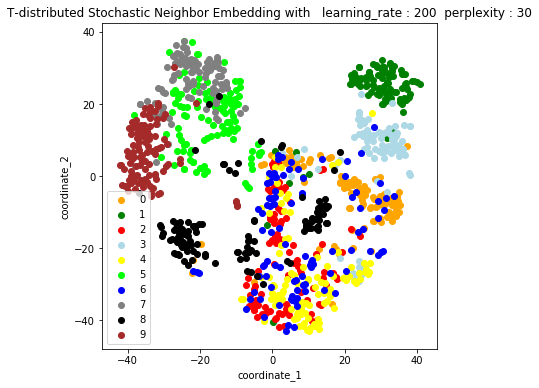

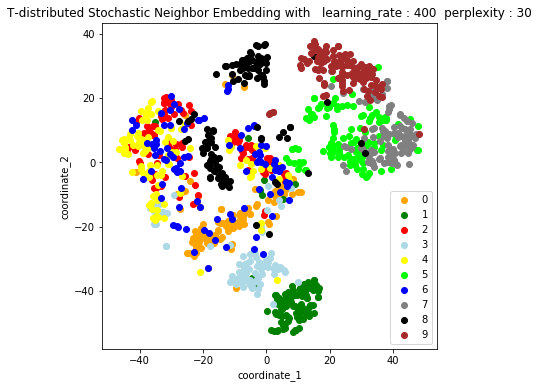

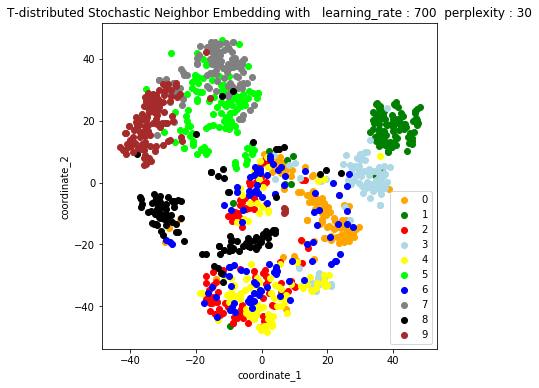

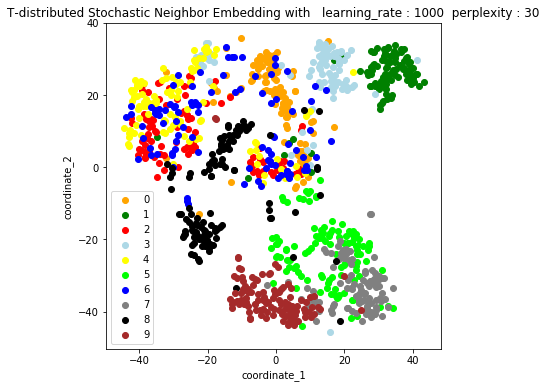

In [61]:
# t-sne algorithm with different learning rate values 

learning_rate_list = [200,400,700,1000]

for i in learning_rate_list:
    
    tsne_experiments(X_subset_scaled,y_subset, i, 30)

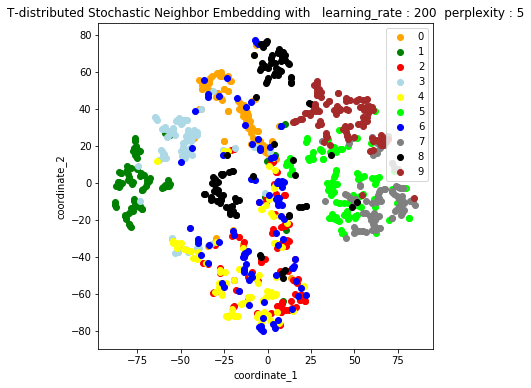

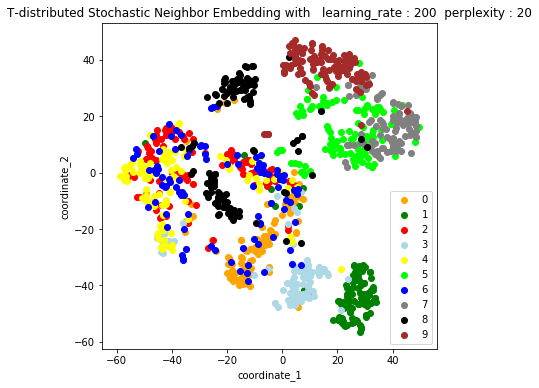

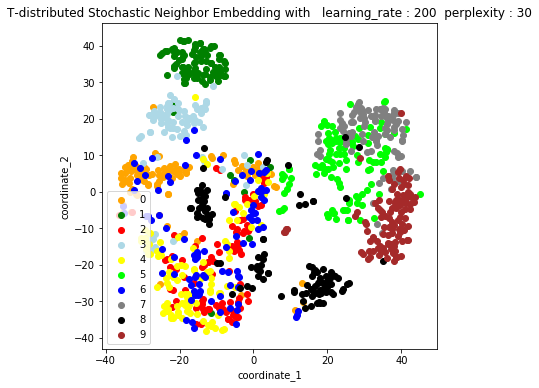

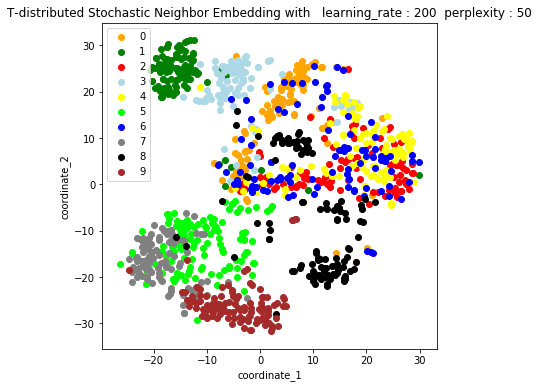

In [62]:
# t-sne algorithm with different perplexity values 

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(X_subset_scaled,y_subset, 200, i)

In [63]:
pca_mnist_coords = projection_methods['PCA'].fit_transform(X_subset_scaled)
ica_mnist_coords = projection_methods['FastICA'].fit_transform(X_subset_scaled)


In [64]:
pca_mnist_coords_dis = euclidean_distances(pca_mnist_coords)
ica_mnist_coords_dis = euclidean_distances(ica_mnist_coords)

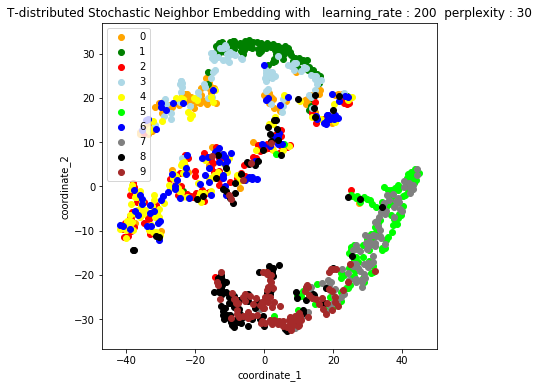

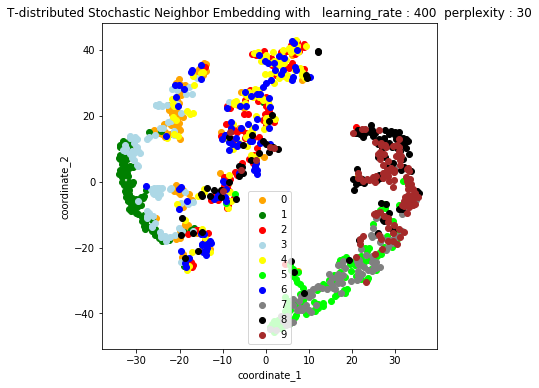

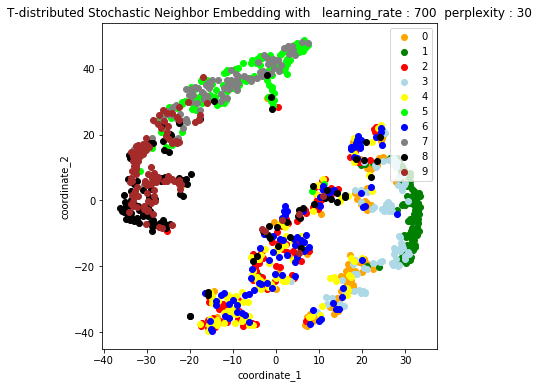

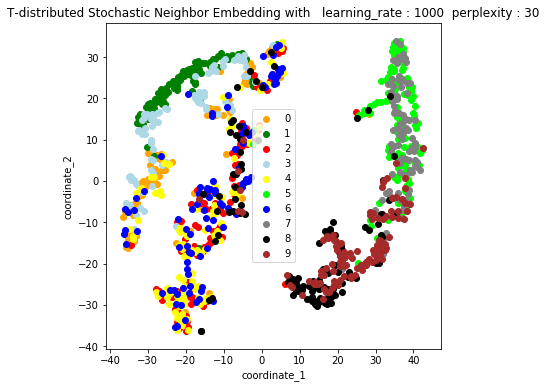

In [65]:
# PCA + t-SNE algorithm with different learning rate values 

learning_rate_list = [200,400,700,1000]

for i in learning_rate_list:
    
    tsne_experiments(pca_mnist_coords, y_subset, i, 30)

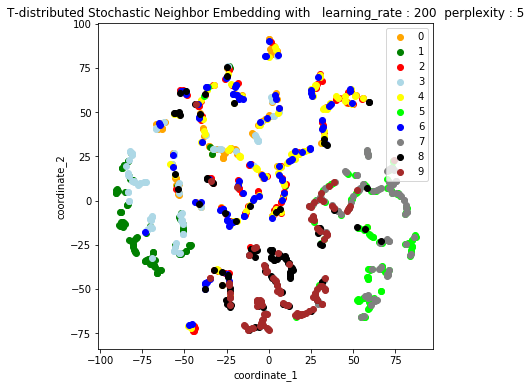

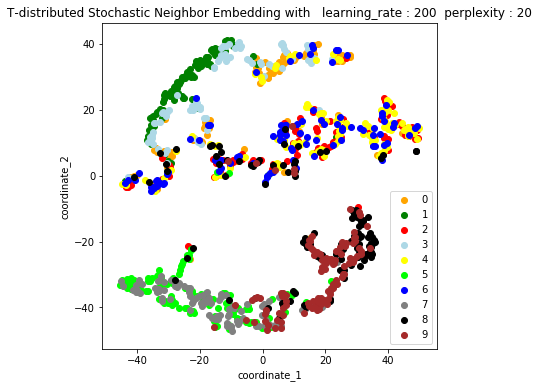

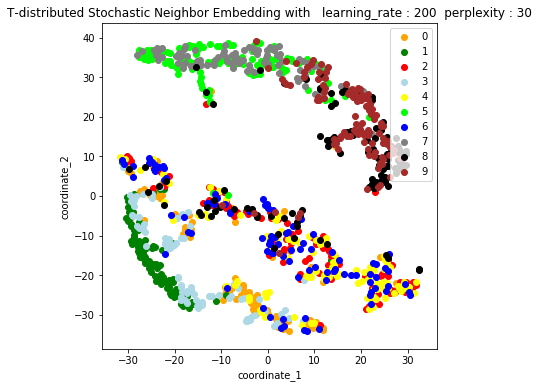

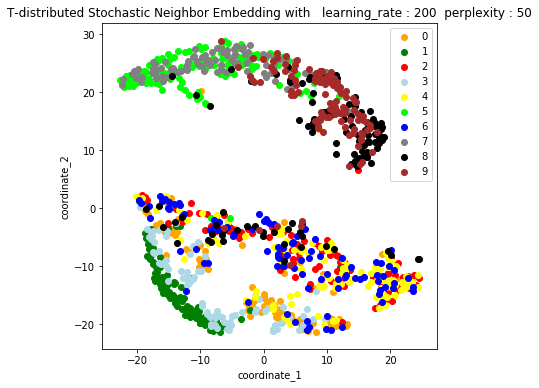

In [66]:
# PCA _+ t-sne algorithm with different perplexity values 

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(pca_mnist_coords, y_subset, 200, i)

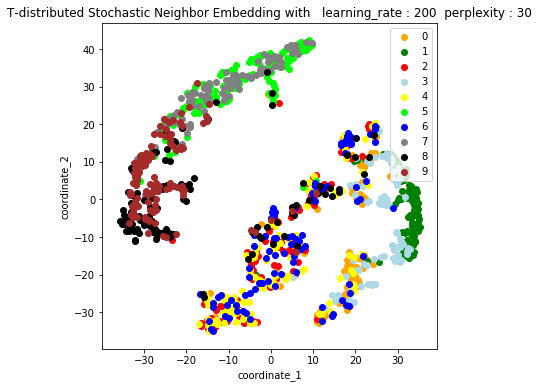

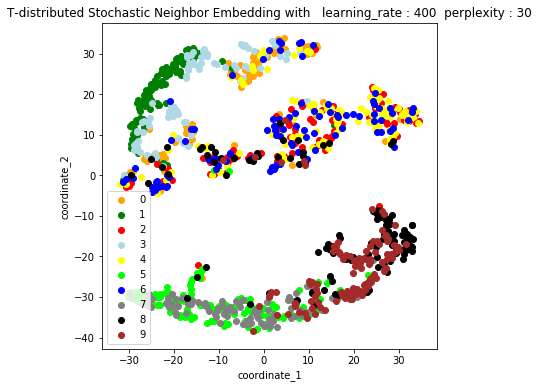

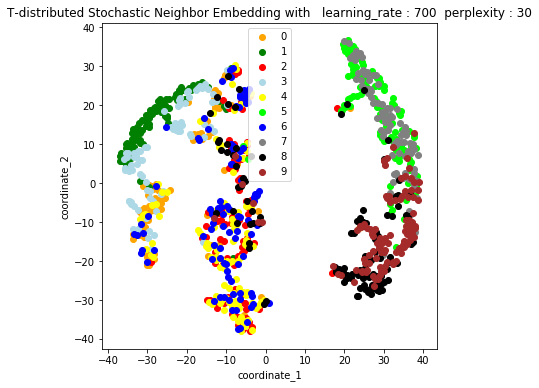

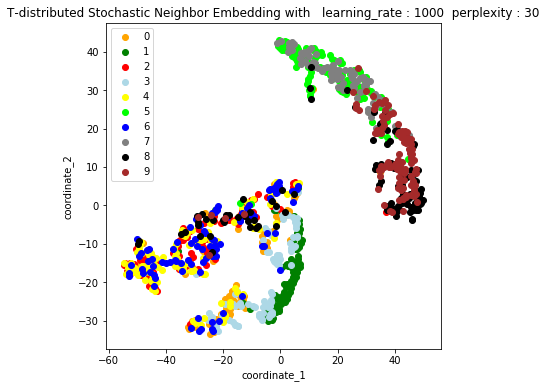

In [67]:
# FastICA + t-sne algorithm with different learning rate values 

learning_rate_list = [200,400,700,1000]

for i in learning_rate_list:
    
    tsne_experiments(ica_mnist_coords, y_subset, i, 30)

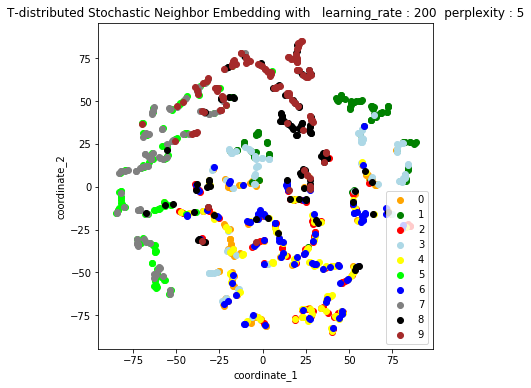

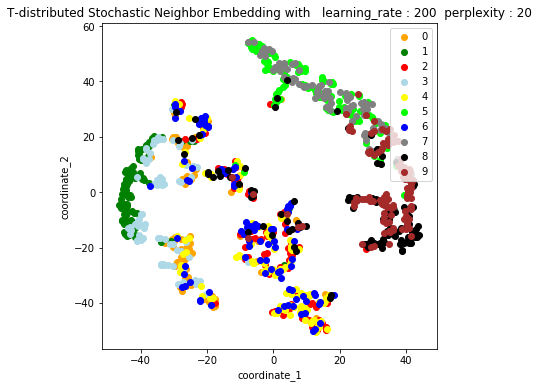

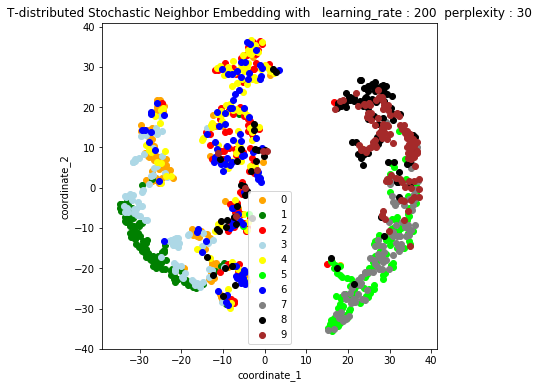

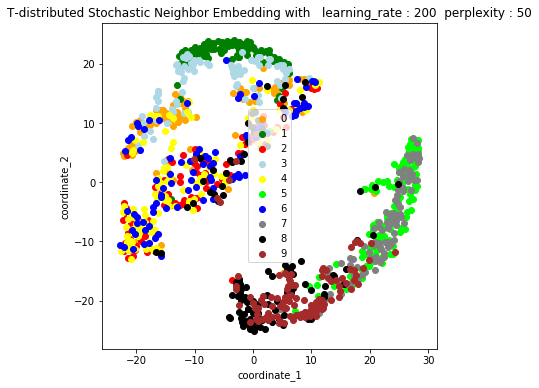

In [68]:
# FastICA + t-SNE algorithm with different values of perplexity 

perplexity_value_list = [5, 20, 30, 50]

for i in perplexity_value_list:
    
    tsne_experiments(ica_mnist_coords, y_subset, 200, i)

<h3 style="color:rgb(208,90,80)">Question (5 Points)</h3>

Your answers here.

From the results of previous experiments, the outcomes with the t-SNE algorithm seem to be the most desirable and the best method among the compared algorithms. Especially, the results of t-SNE with either PCA and FastICA represent significantly outperformed plots of clusterings for the given dataset. Based on the results of the experiments, it is quite reasonable and understandable as the dataset has a high dimension that is unable to contain all of its information into the 2-D coordinates. Therefore, instead of applying the t-SNE algorithm solely, we could expect a significantly enhanced result of identifying clustering by applying t-SNE with a projected dataset in case of a given dataset is in high dimension. 
